#  <u>*Auto Mobile Analysis .*</u>

## <u>*Analysis objective*</u>
### *To predict the Auto Mobile Prices based on given features inputs*

---

In [188]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import json

## *Importing data*

In [189]:
df=pd.read_csv(r"C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/DataSet/automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## *Data shape*

In [190]:
df.shape

(205, 26)

## *Data info*

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

---

## *Data Cleaning*

*A. colums names cleaning: (converting all to small letters and add "_" in spaces between words)*

In [192]:
import janitor
df=df.clean_names()

*B. Replaing "?" symbol with nan-value :*

In [193]:
df=df.replace("?",np.nan)

*C. na-values :*

In [194]:
print(f"The total number of na values are {df.isna().sum().sum()}")
print()
print("The number of na-values in each features are :")
df.isna().sum()

The total number of na values are 59

The number of na-values in each features are :


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

*-- We will replce the NA Values wuth randomly selcted values for the same dataset*

In [195]:
from feature_engine.imputation import RandomSampleImputer
rand_imput=RandomSampleImputer(seeding_method="add")
rand_imput.fit(df)
rand_imput.transform(df)
df=rand_imput.transform(df)

*D. converting features into desired Data Type:*

In [196]:
df=df.infer_objects()
df[["normalized_losses","horsepower","peak_rpm","price"]]=df[["normalized_losses","horsepower","peak_rpm","price"]].astype("int64")
df[["bore","stroke"]]=df[["bore","stroke"]].astype("float64")

---

*Saving the new cleaned dataset*

In [197]:
df.to_csv(r"C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/DataSet/new_cleaned_df.csv", index=False)

## *Exploratory Data Analysis - EDA*

*A. categorical & numerical_features:*

In [198]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

In [199]:
print("we have {} numerical features : {}".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 16 numerical features : ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
we have 10 categorical features : ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']


*B. Basic data statistics:*

* *Numerical data statistics :*

In [200]:
pd.DataFrame(numerical_features).describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized_losses,205.0,120.931707,36.368151,65.00,94.00,115.00,148.00,256.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.331463,0.271957,2.54,3.15,3.31,3.59,3.94
stroke,205.0,3.250878,0.322626,2.07,3.11,3.29,3.41,4.17


* *Categorical data statistics :*

In [201]:
pd.DataFrame(categorical_features).describe().T

,count,unique,top,freq
make,205,22,toyota,32
fuel_type,205,2,gas,185
aspiration,205,2,std,168
num_of_doors,205,2,four,115
body_style,205,5,sedan,96
drive_wheels,205,3,fwd,120
engine_location,205,2,front,202
engine_type,205,7,ohc,148
num_of_cylinders,205,7,four,159
fuel_system,205,8,mpfi,94


*C. EDA - Data Visualization:*

* *Numerical features Visualization :*

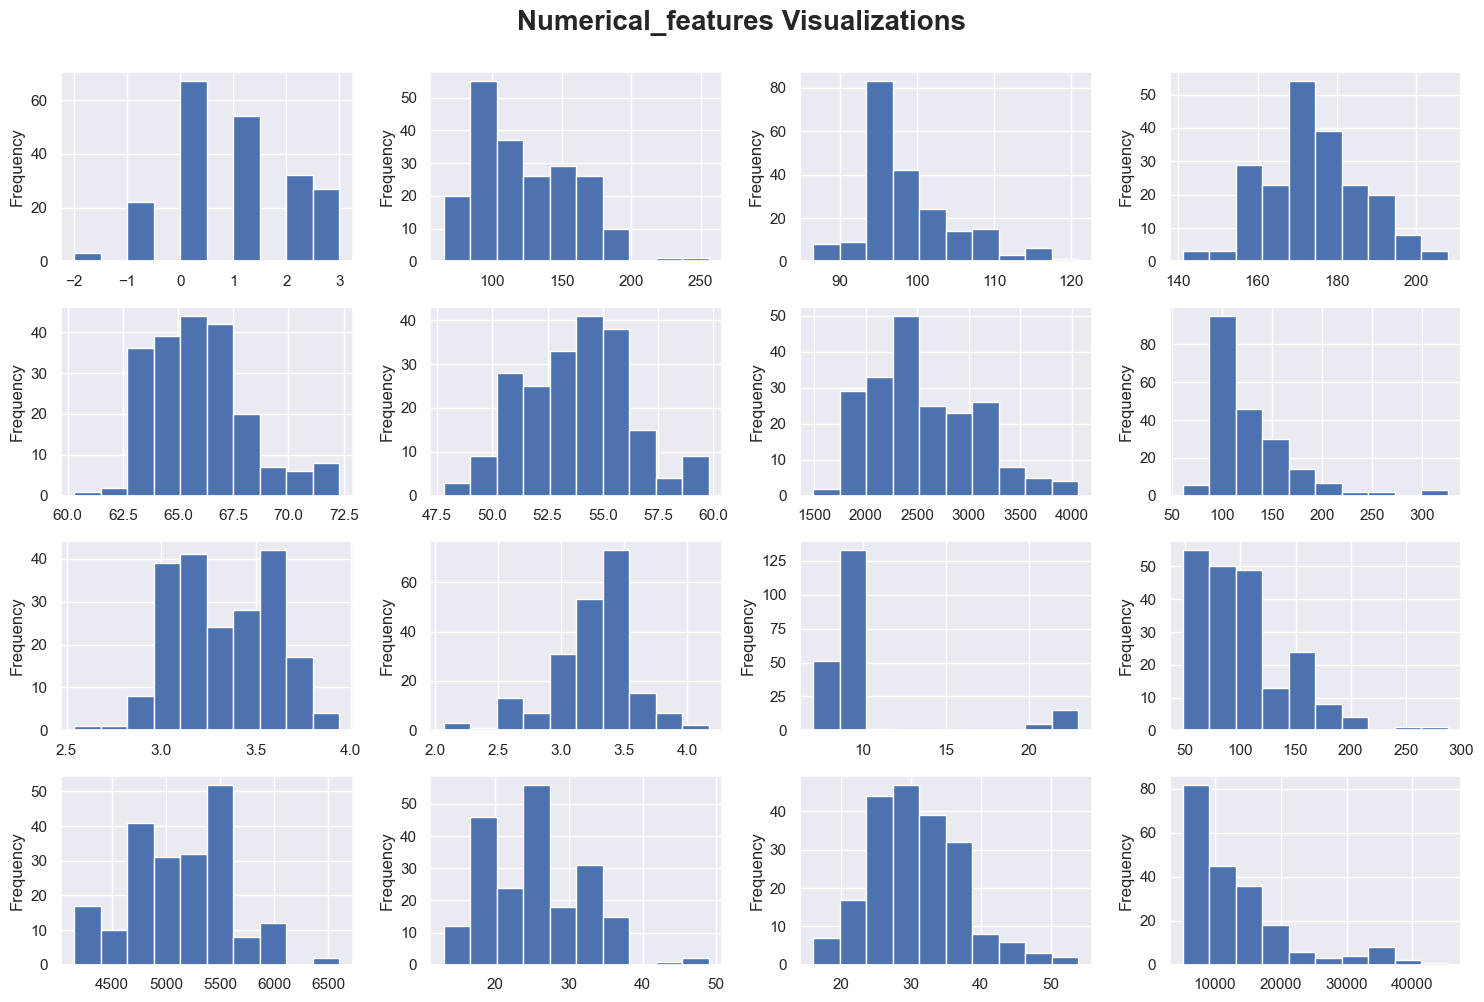

In [15]:
# creating one function for plotting numerical_features
def plot_numerical_features(numerical_features):
    nrows = 4
    ncols = 4

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,10))
    fig.suptitle(f"Numerical_features Visualizations",fontsize=20,fontweight="bold",y=1.)
    
    axes = axes.flatten()

    for i, column in enumerate(numerical_features.columns):
        if i >= nrows * ncols:
            break 
        numerical_features[column].plot(ax=axes[i], kind="hist")
        plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/NumericalFeaturesGrapths/plot_Numerical_Features.png',dpi=500);

    plt.tight_layout()
    plt.show()
    
plot_numerical_features(numerical_features)

 * *we can see that some faetures looks like it has outliers except (sympoling,bore,height,curb_wieght)  features, but when we have a close look at these data points we can see that these points are not close to the 4th quantule range and not extremnly vary*

* *Categorical features Visualization :*

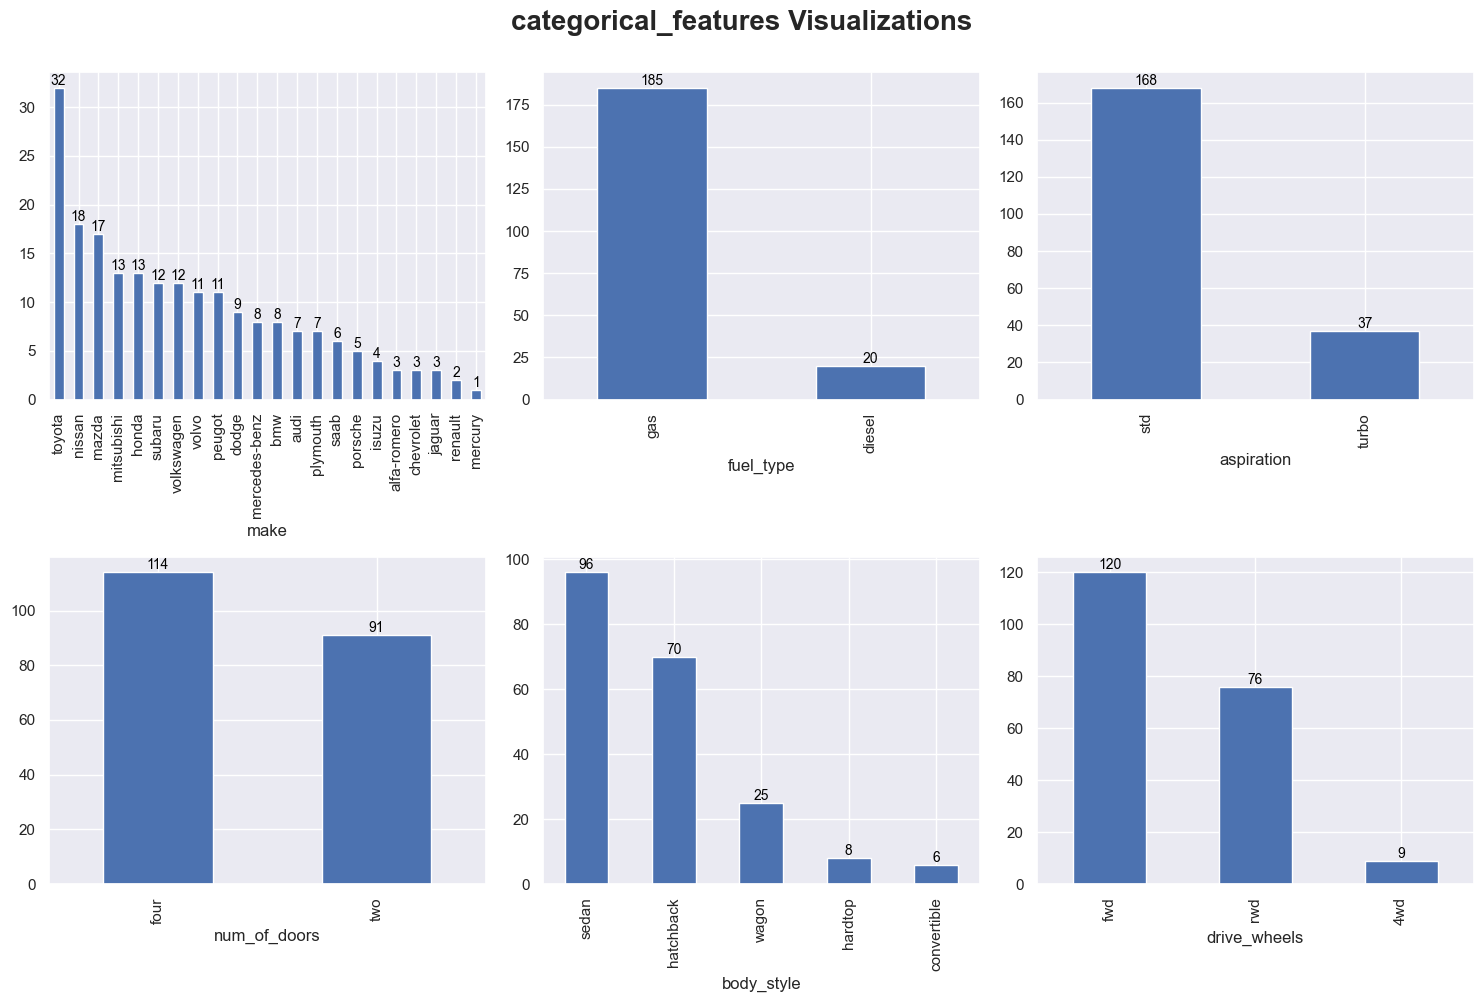

In [16]:
def plot_categorical_features(categorical_features):
    nrows = 2
    ncols = 3
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
    fig.suptitle(f"categorical_features Visualizations",fontsize=20,fontweight="bold",y=1.)

    axes = axes.flatten()
    
    for i, column in enumerate(categorical_features.columns):
        if i >= nrows * ncols:
            break 
        ax = axes[i]
        counts = categorical_features[column].value_counts()
        counts.plot(kind='bar', ax=ax)
        
        for bar in ax.patches:
            ax.annotate(
                str(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points'
            )
        plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/CategoricalFeaturesGrapths/plot_Categorical_Features.png',dpi=500);
        
    plt.tight_layout()
    plt.show()

plot_categorical_features(categorical_features)  


*C. EDA Correlation*

* *As the data are not normally ditributed we will use spearman meathos*

In [125]:
numerical_features.corr(method="spearman")

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.388708,-0.537958,-0.396365,-0.253528,-0.523124,-0.256490,-0.176542,-0.154080,-0.027951,0.023008,-0.017373,0.292603,-0.018317,0.053316,-0.140440
normalized_losses,0.388708,1.000000,-0.100108,-0.020101,0.034754,-0.298708,0.024454,0.033779,-0.085969,0.109309,-0.043349,0.119185,0.192967,-0.121517,-0.094326,0.107325
wheel_base,-0.537958,-0.100108,1.000000,0.912391,0.812300,0.632947,0.765291,0.648305,0.527182,0.228408,-0.126268,0.502231,-0.311421,-0.492849,-0.538680,0.679269
length,-0.396365,-0.020101,0.912391,1.000000,0.888201,0.525148,0.890415,0.782616,0.628945,0.187812,-0.192663,0.659594,-0.272079,-0.670013,-0.697949,0.807948
width,-0.253528,0.034754,0.812300,0.888201,1.000000,0.350279,0.863815,0.770615,0.607859,0.236978,-0.145537,0.686292,-0.199339,-0.687690,-0.700999,0.792842
height,-0.523124,-0.298708,0.632947,0.525148,0.350279,1.000000,0.345852,0.199811,0.199235,-0.011829,0.000231,0.017790,-0.308801,-0.068625,-0.132512,0.275001
curb_weight,-0.256490,0.024454,0.765291,0.890415,0.863815,0.345852,1.000000,0.877739,0.694905,0.162995,-0.219100,0.805750,-0.237369,-0.812947,-0.834385,0.894039
engine_size,-0.176542,0.033779,0.648305,0.782616,0.770615,0.199811,0.877739,1.000000,0.680023,0.296008,-0.234636,0.816027,-0.273630,-0.730056,-0.721342,0.811379
bore,-0.154080,-0.085969,0.527182,0.628945,0.607859,0.199235,0.694905,0.680023,1.000000,-0.092379,-0.148299,0.637664,-0.278229,-0.618299,-0.624652,0.629626
stroke,-0.027951,0.109309,0.228408,0.187812,0.236978,-0.011829,0.162995,0.296008,-0.092379,1.000000,-0.072498,0.132740,-0.082214,-0.022484,-0.021772,0.127549


* *Correlation -heatmap- price as target fetaure*

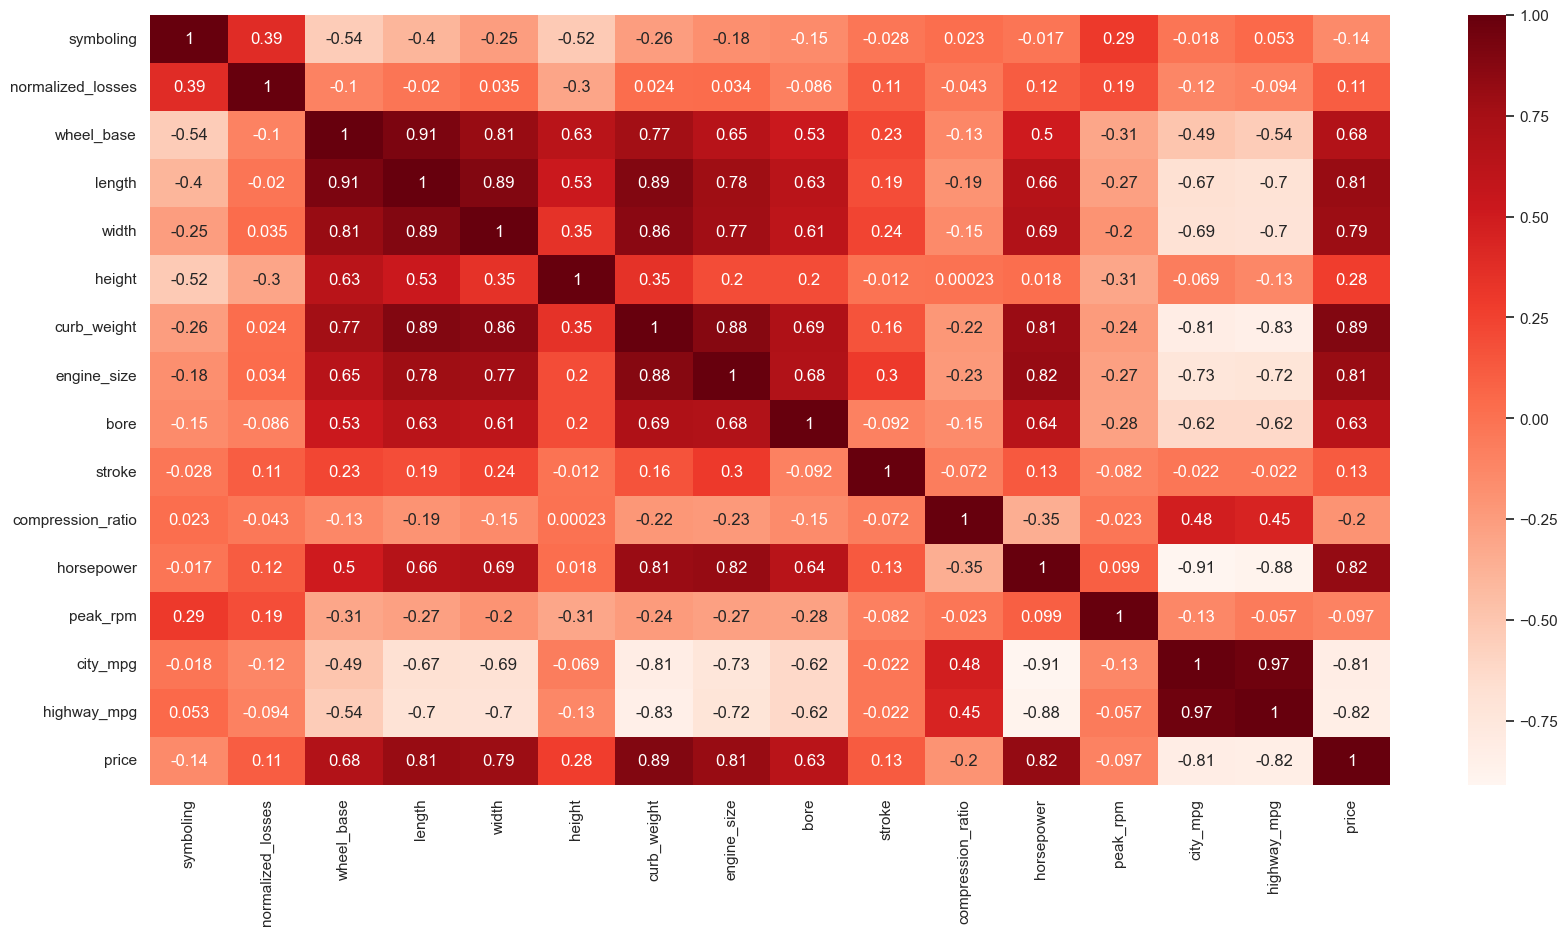

In [126]:
sns.heatmap(numerical_features.corr(method="spearman"),annot=True,cmap='Reds');
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/correlationGrapths/plot_correlation_Features.png',dpi=500);

* *Correlation -scatterplot- price as target fetaure*

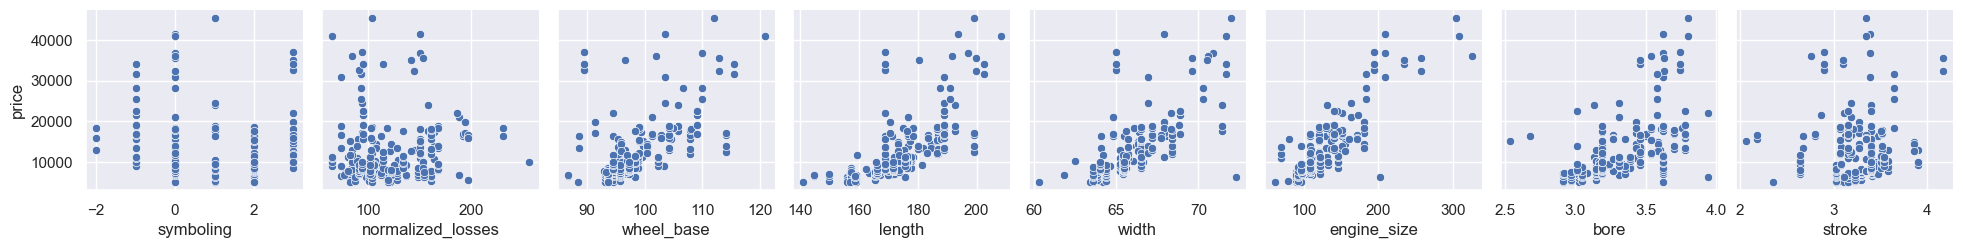

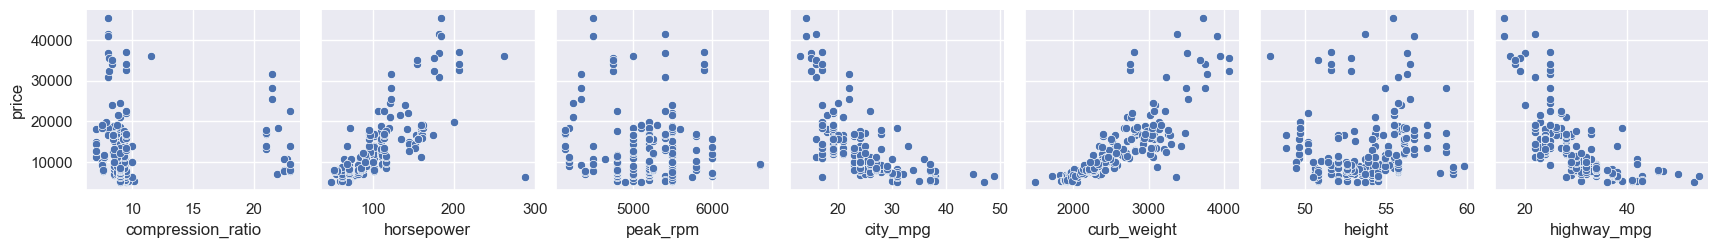

In [127]:
matplotlib.rcParams["figure.figsize"]=(20,10)
sns.pairplot(data=numerical_features,
             x_vars=['symboling', 'normalized_losses', 'wheel_base', 'length', 'width','engine_size', 'bore', 'stroke'],
             y_vars='price');
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/pointsplotGrapths/plot_pointsplot1_Features.png',dpi=500);

sns.pairplot(data=numerical_features,
             x_vars=['compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg','curb_weight','height','highway_mpg'],
             y_vars='price');
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/pointsplotGrapths/plot_pointsplot2_Features.png',dpi=500);

---

## *Inferential tests - Price as target feature*

*A. shapiro test for normality check :*

In [202]:
from scipy.stats import shapiro
stat, p_value = shapiro(df["price"])
print(f"Shapiro-Wilk Test: Statistic={stat}, P-value={p_value}\n===> p-value < 0.05 ===> Data is not normally distributed.")

Shapiro-Wilk Test: Statistic=0.8058111841577479, P-value=2.9869383238563413e-15
===> p-value < 0.05 ===> Data is not normally distributed.


*A 1. Price Feature Visualization :*

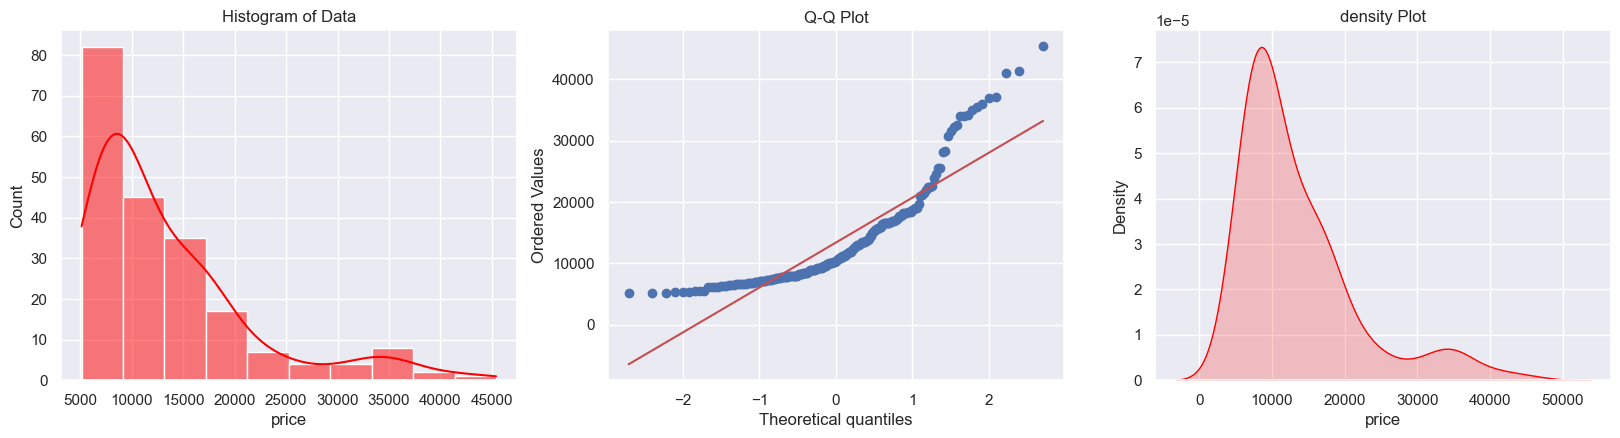

In [203]:
plt.subplot(231)
sns.histplot(df["price"], bins=10, kde=True, color="red")
plt.title("Histogram of Data")

import scipy.stats as stats
plt.subplot(232)
stats.probplot(df["price"], dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.subplot(233)
sns.kdeplot(df["price"], color="red", fill=True, alpha=0.2)
plt.title("density Plot")
plt.show()

*B. Applying Non Paramertic tests :*

*B 1. Mann-Whitney U Test for comparing price between features with two groups :*

In [204]:
## Creating One Function to apply the test:
def mannwhitneyu_Test(col):
    from scipy.stats import kruskal
    groups = [df[df[col] == g]["price"] for g in df[col].unique()]
    stat, p = kruskal(*groups)
    print(f"Mann-Whitney U Test Statistic: {stat:.4f}")
    print(f"P-value: {p:.4f}")
    alpha = 0.05
    if p < alpha:
        print("====> Reject the null hypothesis: The two groups have significantly different distributions.")
    else:
        print("====> Fail to reject the null hypothesis: No significant difference between the groups.")


## Creating One Function to apply the visualizatiopn:
def Visualize_mannwhitneyu_Test1(col):
    plt.subplot(221)
    ax = sns.barplot(data=df.groupby(col)["price"].mean().to_frame(),x=col,y="price")
    ax.set(title=f'mean price by {col}')
    for i in ax.containers:
     ax.bar_label(i,);

    plt.subplot(222)
    sns.boxplot(x=df[col], y=df["price"])
    plt.title("Boxplot of Groups (Mann-Whitney U Test)")
    plt.show()
    

* *B 1.1  price by engine_location :*

In [205]:
df.groupby("engine_location").agg(price_mean=('price', 'mean'),
                               price_median=('price', 'median'),).T

engine_location,front,rear
price_mean,13073.69802,34528.0
price_median,10270.00000,34028.0


In [206]:
#plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/PriceMeanByCategories/plot_price_mean_by_engine_location.png',dpi=500);

Mann-Whitney U Test Statistic: 7.6716
P-value: 0.0056
====> Reject the null hypothesis: The two groups have significantly different distributions.


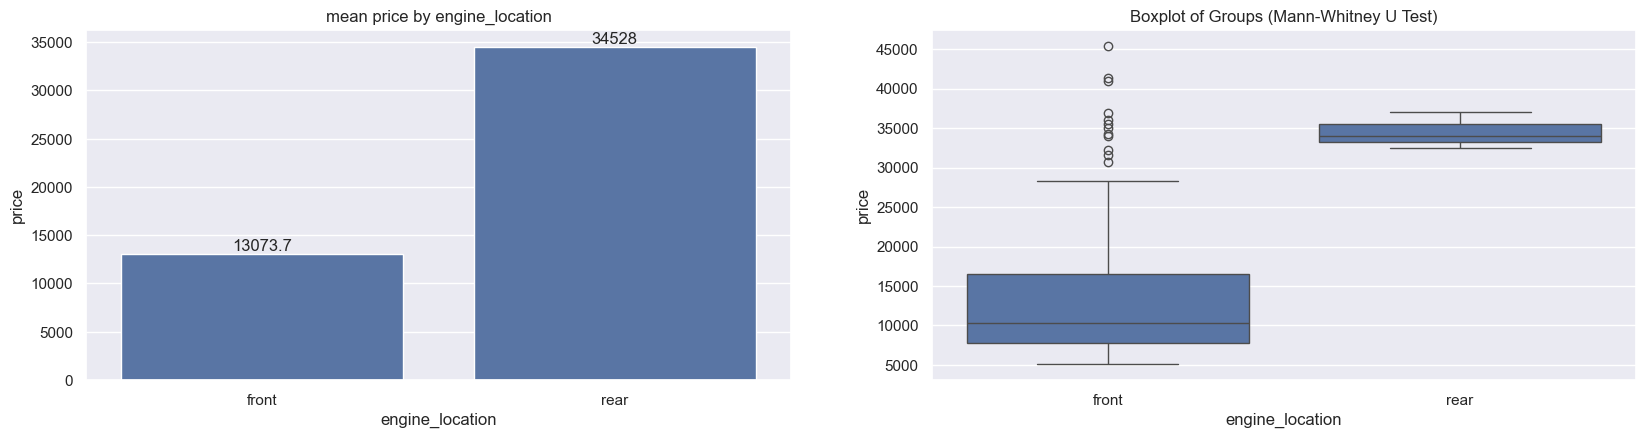

In [207]:
mannwhitneyu_Test("engine_location")
Visualize_mannwhitneyu_Test1("engine_location") 

---

* *B 1.2 price by num_of_doors*

In [337]:
df.groupby("num_of_doors").agg(price_mean=('price', 'mean'),
                               price_median=('price', 'median'),).T

num_of_doors,four,two
price_mean,13449.33913,12625.811111
price_median,10898.00000,9927.000000


Mann-Whitney U Test Statistic: 3.7615
P-value: 0.0524
====> Fail to reject the null hypothesis: No significant difference between the groups.


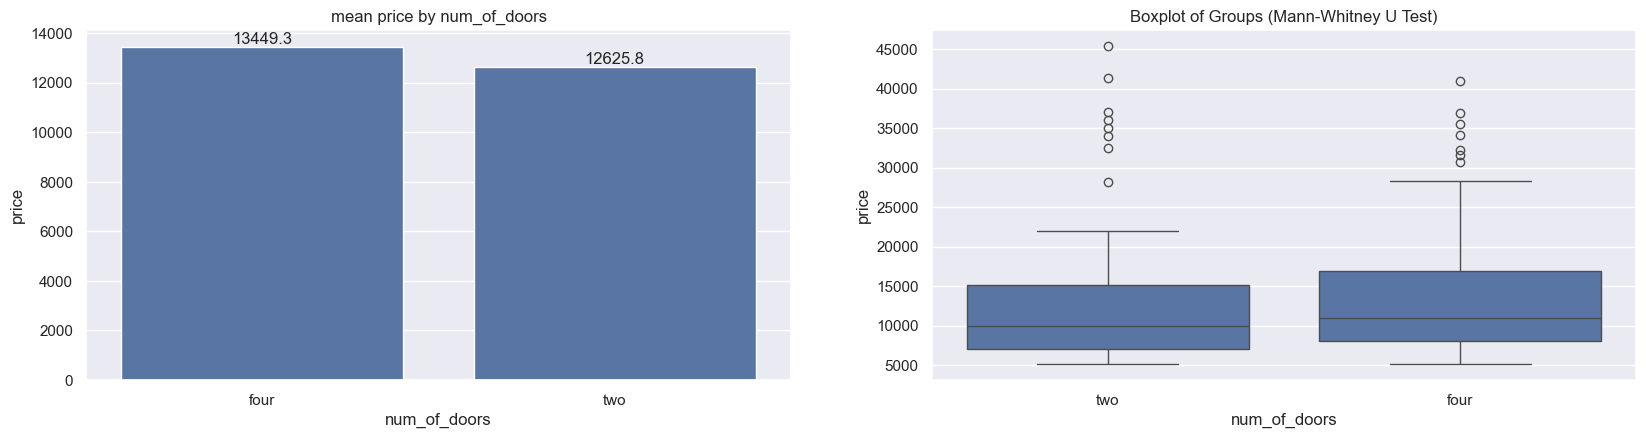

In [338]:
mannwhitneyu_Test("num_of_doors")
Visualize_mannwhitneyu_Test1("num_of_doors") 

---

* *B 1.3 price by aspiration :*

In [339]:
df.groupby("aspiration").agg(price_mean=('price', 'mean'),
                               price_median=('price', 'median'),).T

aspiration,std,turbo
price_mean,12420.029762,16119.783784
price_median,9296.500000,14869.000000


Mann-Whitney U Test Statistic: 19.5815
P-value: 0.0000
====> Reject the null hypothesis: The two groups have significantly different distributions.


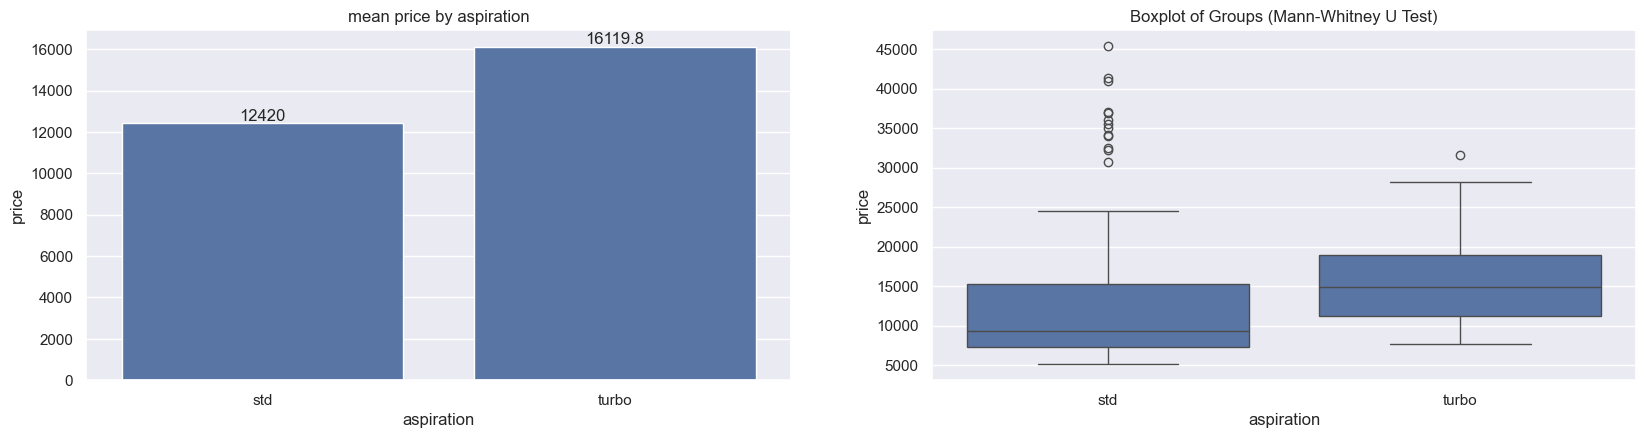

In [340]:
mannwhitneyu_Test("aspiration")
Visualize_mannwhitneyu_Test1("aspiration") 

---

* *B 1.4 price by fuel_type*

In [341]:
df.groupby("fuel_type").agg(price_mean=('price', 'mean'),
                               price_median=('price', 'median'),).T

fuel_type,diesel,gas
price_mean,15838.15,12790.454054
price_median,13852.50,9988.000000


Mann-Whitney U Test Statistic: 4.5401
P-value: 0.0331
====> Reject the null hypothesis: The two groups have significantly different distributions.


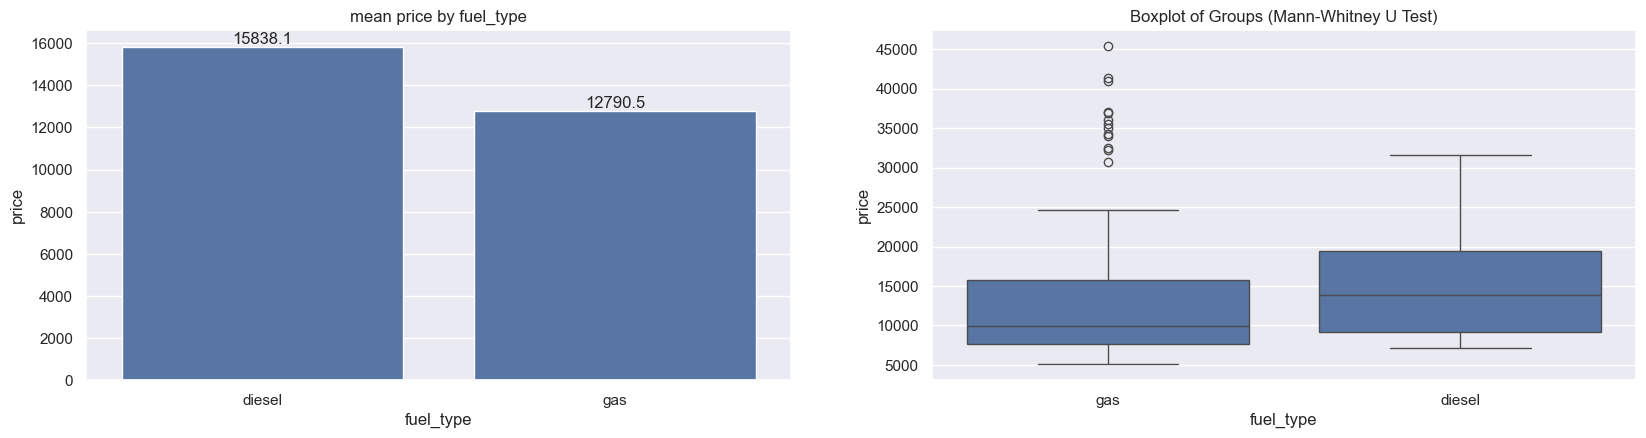

In [342]:
mannwhitneyu_Test("fuel_type")
Visualize_mannwhitneyu_Test1("fuel_type") 

---

*B 2. Kruskal_Wallis_Test for comparing price between features with more than two groups :*

In [343]:
## Creating One Function to apply the test:
def Kruskal_Wallis_Test(col):
    groups = [df[df[col] == g]["price"] for g in df[col].unique()]
    from scipy.stats import kruskal
    stat, p = kruskal(*groups)
    print(f"######  Kruskal-Wallis Test for {col} group ######")
    print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
    print(f"P-value: {p:.4f}")

    # Interpretation
    alpha = 0.05
    if p < alpha:
        print("====> Reject the null hypothesis: At least one group differs significantly.")
    else:
        print("====> Fail to reject the null hypothesis: No significant difference between groups.") 

## Creating One Function to apply the visualizatiopn:
def Visualize_Kruskal_Wallis_Test(col):
    plt.subplot(221)
    ax = sns.barplot(data=df.groupby(col)["price"].mean().to_frame(),x=col,y="price")
    ax.set(title=f'mean price by {col}')
    for i in ax.containers:
     ax.bar_label(i,);

    plt.subplot(222)
    sns.boxplot(x=df[col], y=df["price"])
    plt.title("Boxplot of Groups (Kruskal_Wallis_Test)")
    plt.show()     

* *B 2.1 price by fuel_system*

In [344]:
df.groupby("fuel_system").agg(price_mean=('price', 'mean'),
                               price_median=('price', 'median'),).T

fuel_system,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
price_mean,7555.545455,7371.090909,12145.0,15838.15,12964.0,17417.765957,10990.444444,11048.0
price_median,7295.000000,7248.500000,11845.0,13852.50,12964.0,15720.000000,9959.000000,11048.0


######  Kruskal-Wallis Test for fuel_system group ######
Kruskal-Wallis Test Statistic: 122.3485
P-value: 0.0000
====> Reject the null hypothesis: At least one group differs significantly.


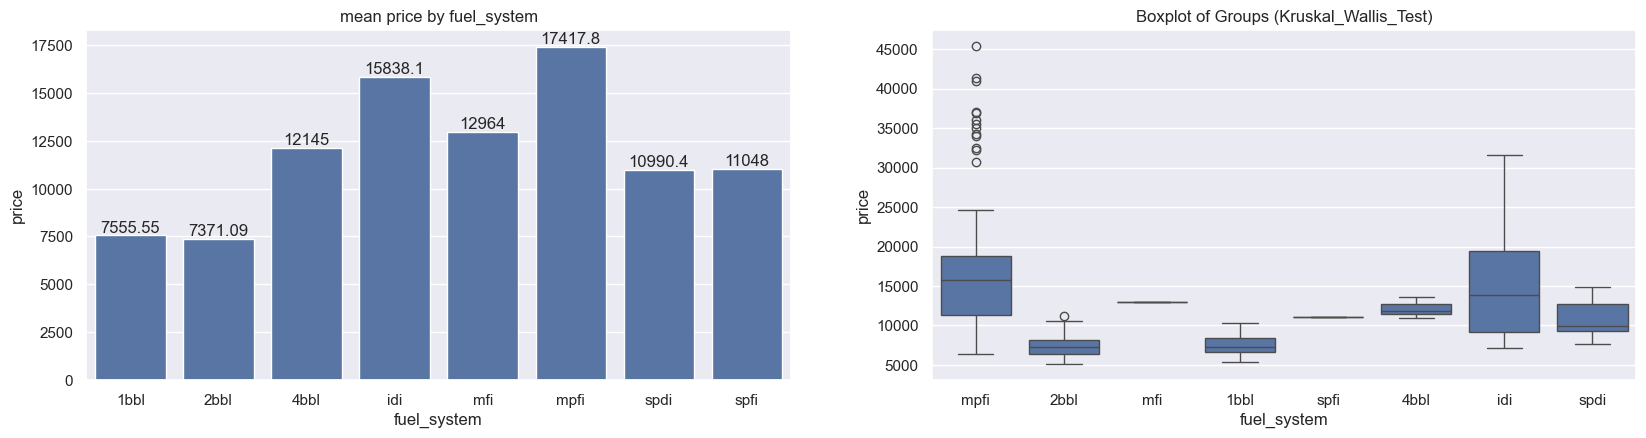

In [345]:
Kruskal_Wallis_Test("fuel_system")
Visualize_Kruskal_Wallis_Test("fuel_system") 

In [408]:
#!pip install scikit-posthocs
import scikit_posthocs as sp

posthoc_results = sp.posthoc_dunn(df, val_col="price", group_col="fuel_system", p_adjust="bonferroni")
    
print("Dunn’s Post-Hoc Test (Adjusted P-values):")
posthoc_results

Dunn’s Post-Hoc Test (Adjusted P-values):


,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
1bbl,1.000000,1.000000e+00,1.000000,6.485645e-03,1.0,1.093955e-05,1.000000,1.0
2bbl,1.000000,1.000000e+00,0.744295,5.188584e-07,1.0,6.792855e-24,0.175879,1.0
4bbl,1.000000,7.442954e-01,1.000000,1.000000e+00,1.0,1.000000e+00,1.000000,1.0
idi,0.006486,5.188584e-07,1.000000,1.000000e+00,1.0,1.000000e+00,1.000000,1.0
mfi,1.000000,1.000000e+00,1.000000,1.000000e+00,1.0,1.000000e+00,1.000000,1.0
mpfi,0.000011,6.792855e-24,1.000000,1.000000e+00,1.0,1.000000e+00,1.000000,1.0
spdi,1.000000,1.758789e-01,1.000000,1.000000e+00,1.0,1.000000e+00,1.000000,1.0
spfi,1.000000,1.000000e+00,1.000000,1.000000e+00,1.0,1.000000e+00,1.000000,1.0


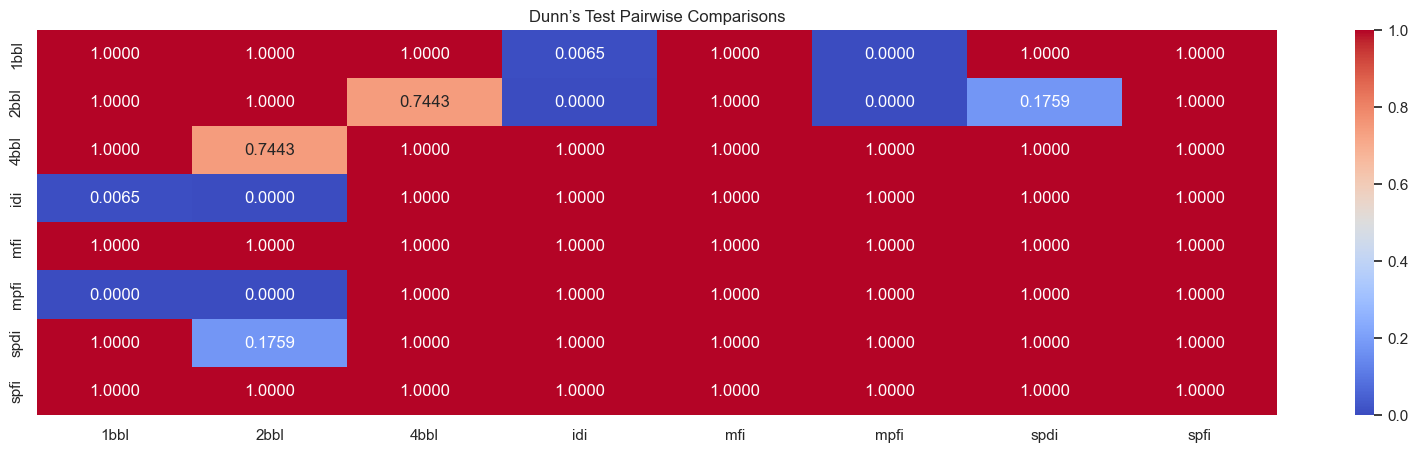

In [409]:
# Visualization
plt.figure(figsize=(20, 5))
sns.heatmap(posthoc_results, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Dunn’s Test Pairwise Comparisons")
plt.show()

---

* *B 2.2 price by num_of_cylinders*

In [410]:
df.groupby("num_of_cylinders").agg(price_mean=('price', 'mean'),
                               price_median=('price', 'median'),).T

num_of_cylinders,eight,five,four,six,three,twelve,two
price_mean,32387.6,21030.454545,10241.314465,23671.833333,5151.0,36000.0,13020.0
price_median,35056.0,18920.000000,8948.000000,21037.500000,5151.0,36000.0,12745.0


######  Kruskal-Wallis Test for num_of_cylinders group ######
Kruskal-Wallis Test Statistic: 74.7633
P-value: 0.0000
====> Reject the null hypothesis: At least one group differs significantly.


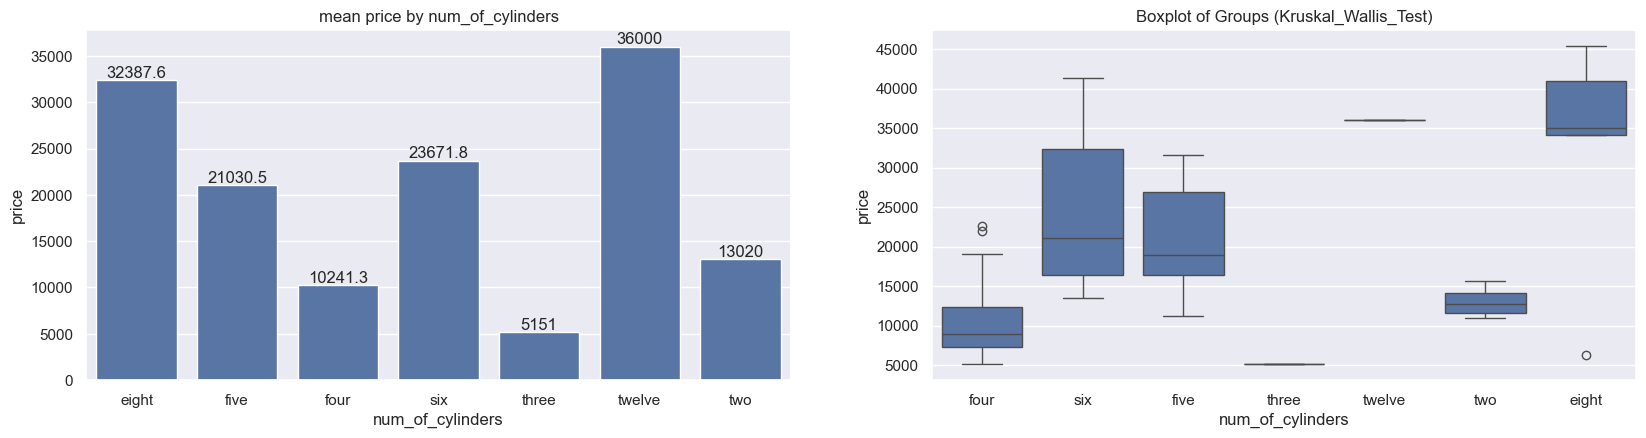

In [411]:
Kruskal_Wallis_Test("num_of_cylinders")
Visualize_Kruskal_Wallis_Test("num_of_cylinders") 

In [412]:
posthoc_results = sp.posthoc_dunn(df, val_col="price", group_col="num_of_cylinders", p_adjust="bonferroni")
    
print("Dunn’s Post-Hoc Test (Adjusted P-values):")
posthoc_results

Dunn’s Post-Hoc Test (Adjusted P-values):


,eight,five,four,six,three,twelve,two
eight,1.000000,1.000000,7.053238e-02,1.000000e+00,0.264917,1.000000,1.0
five,1.000000,1.000000,1.357749e-04,1.000000e+00,0.151304,1.000000,1.0
four,0.070532,0.000136,1.000000e+00,1.012998e-10,1.000000,1.000000,1.0
six,1.000000,1.000000,1.012998e-10,1.000000e+00,0.090391,1.000000,1.0
three,0.264917,0.151304,1.000000e+00,9.039116e-02,1.000000,0.383653,1.0
twelve,1.000000,1.000000,1.000000e+00,1.000000e+00,0.383653,1.000000,1.0
two,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,1.0


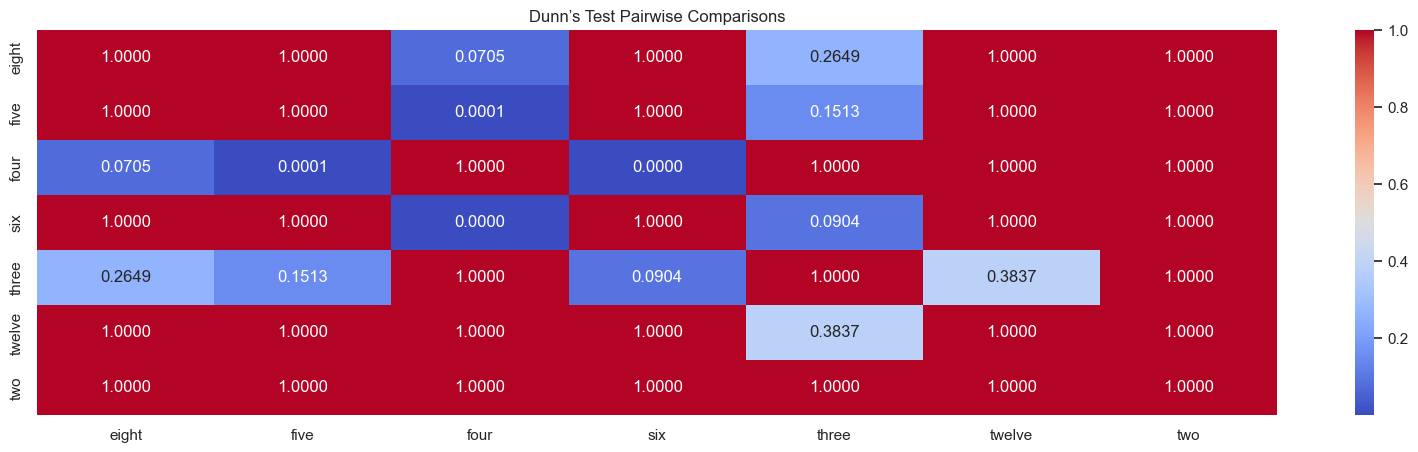

In [413]:
# Visualization
plt.figure(figsize=(20, 5))
sns.heatmap(posthoc_results, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Dunn’s Test Pairwise Comparisons")
plt.show()

---

* *B 2.3 price by engine_type*

In [414]:
df.groupby("engine_type").agg(price_mean=('price', 'mean'),
                               price_median=('price', 'median'),).T

engine_type,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
price_mean,18116.416667,6338.0,14627.583333,11481.709459,13738.6,25098.384615,13020.0
price_median,16249.000000,6338.0,16105.000000,9022.000000,9233.0,19699.000000,12745.0


######  Kruskal-Wallis Test for engine_type group ######
Kruskal-Wallis Test Statistic: 40.5905
P-value: 0.0000
====> Reject the null hypothesis: At least one group differs significantly.


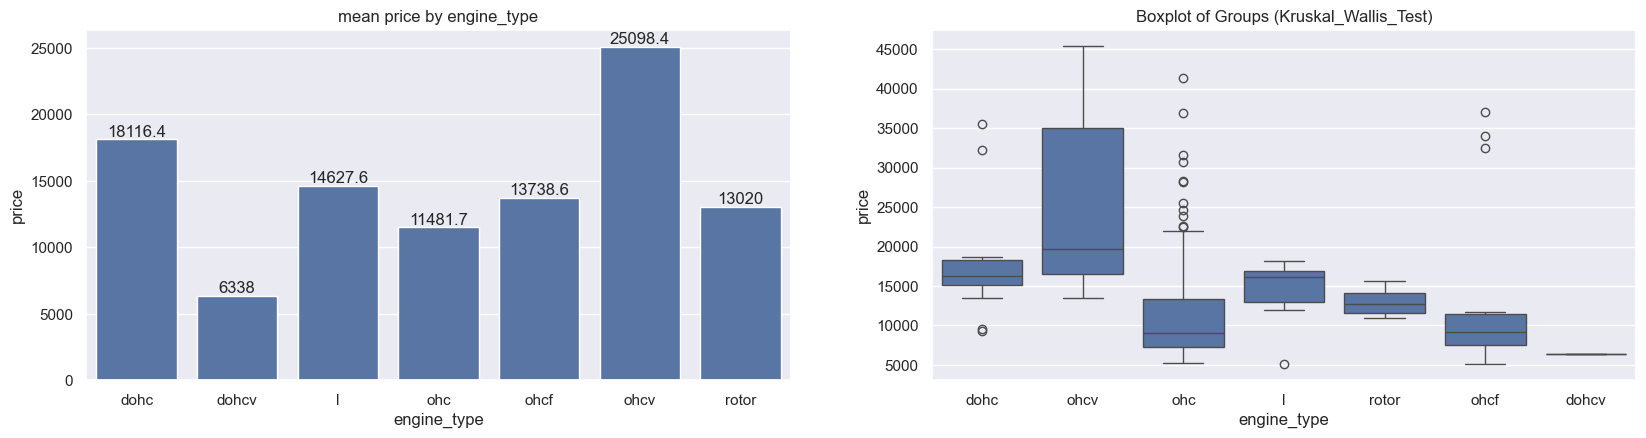

In [415]:
Kruskal_Wallis_Test("engine_type")
Visualize_Kruskal_Wallis_Test("engine_type") 

In [416]:
posthoc_results = sp.posthoc_dunn(df, val_col="price", group_col="engine_type", p_adjust="bonferroni")
    
print("Dunn’s Post-Hoc Test (Adjusted P-values):")
posthoc_results

Dunn’s Post-Hoc Test (Adjusted P-values):


,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
dohc,1.000000,0.627625,1.000000,0.013534,0.233973,1.000000,1.0
dohcv,0.627625,1.000000,1.000000,1.000000,1.000000,0.223607,1.0
l,1.000000,1.000000,1.000000,0.182732,1.000000,1.000000,1.0
ohc,0.013534,1.000000,0.182732,1.000000,1.000000,0.000021,1.0
ohcf,0.233973,1.000000,1.000000,1.000000,1.000000,0.006092,1.0
ohcv,1.000000,0.223607,1.000000,0.000021,0.006092,1.000000,1.0
rotor,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


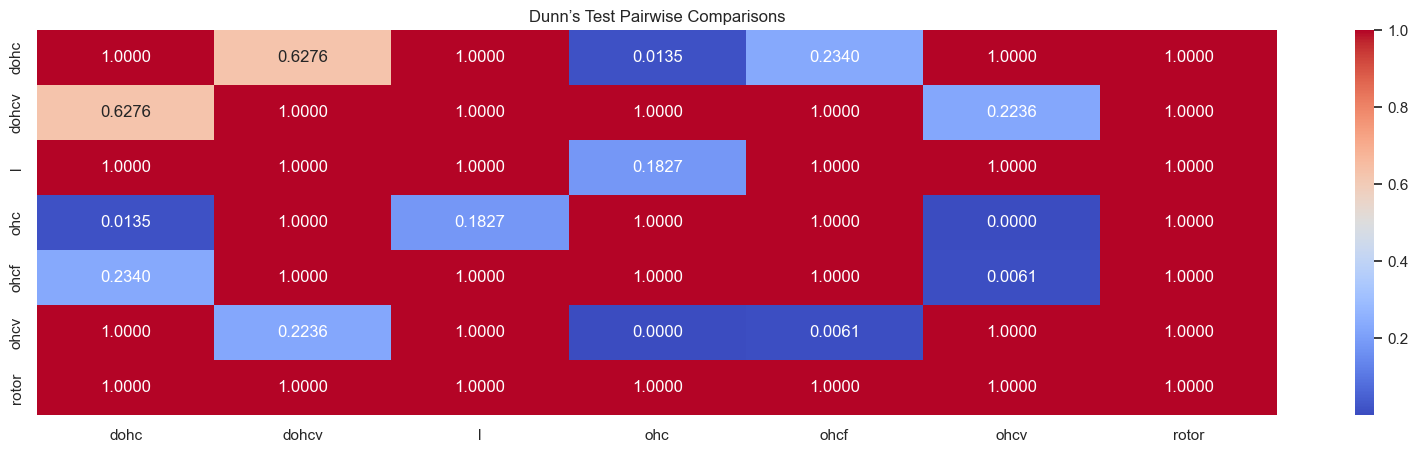

In [417]:
# Visualization
plt.figure(figsize=(20, 5))
sns.heatmap(posthoc_results, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Dunn’s Test Pairwise Comparisons")
plt.show()

---

* *B 2.4 price by drive_wheels*

In [418]:
df.groupby("drive_wheels").agg(price_mean=('price', 'mean'),
                               price_median=('price', 'median'),).T

drive_wheels,4wd,fwd,rwd
price_mean,10354.111111,9180.425,19581.039474
price_median,9233.000000,8094.000,16872.500000


######  Kruskal-Wallis Test for drive_wheels group ######
Kruskal-Wallis Test Statistic: 91.0464
P-value: 0.0000
====> Reject the null hypothesis: At least one group differs significantly.


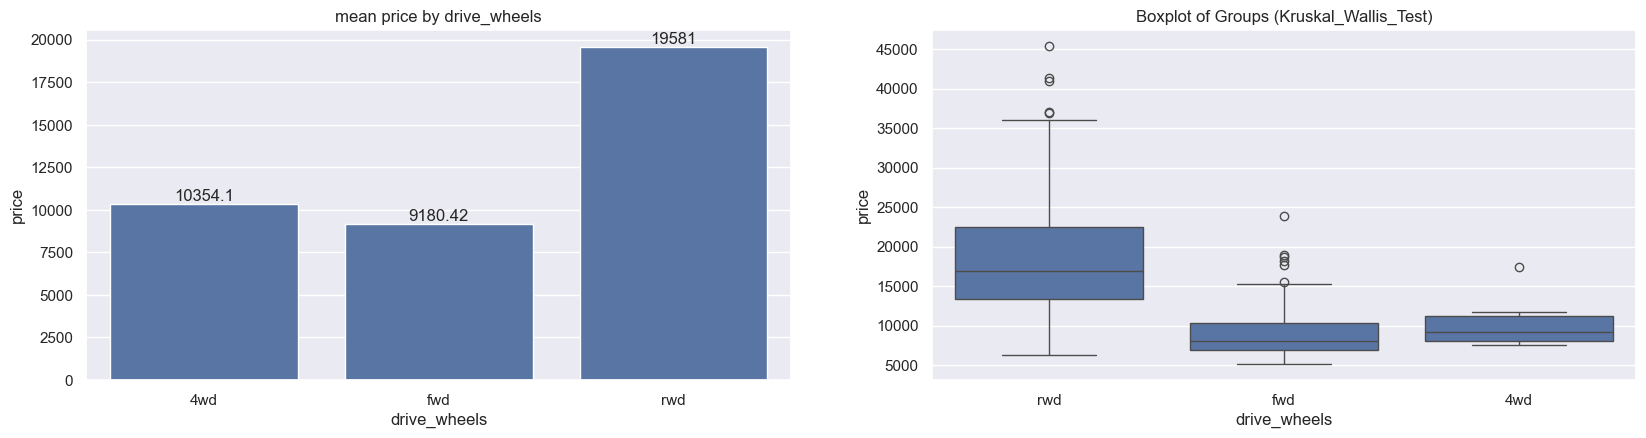

In [419]:
Kruskal_Wallis_Test("drive_wheels")
Visualize_Kruskal_Wallis_Test("drive_wheels") 

In [420]:
posthoc_results = sp.posthoc_dunn(df, val_col="price", group_col="drive_wheels", p_adjust="bonferroni")
    
print("Dunn’s Post-Hoc Test (Adjusted P-values):")
posthoc_results

Dunn’s Post-Hoc Test (Adjusted P-values):


,4wd,fwd,rwd
4wd,1.000000,7.774482e-01,1.281084e-02
fwd,0.777448,1.000000e+00,4.654231e-21
rwd,0.012811,4.654231e-21,1.000000e+00


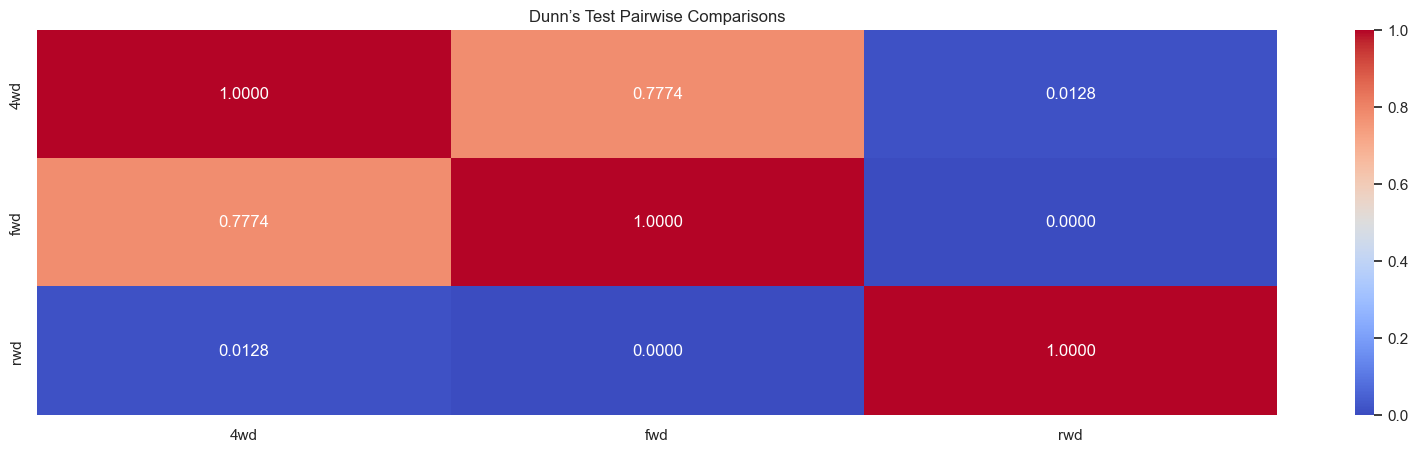

In [421]:
# Visualization
plt.figure(figsize=(20, 5))
sns.heatmap(posthoc_results, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Dunn’s Test Pairwise Comparisons")
plt.show()

---

* *B 2.5 price by body_style*

In [422]:
df.groupby("body_style").agg(price_mean=('price', 'mean'),
                               price_median=('price', 'median'),).T

body_style,convertible,hardtop,hatchback,sedan,wagon
price_mean,21890.5,22208.5,9924.328571,14270.666667,12371.96
price_median,17084.5,19687.5,8672.000000,10846.500000,11694.00


######  Kruskal-Wallis Test for body_style group ######
Kruskal-Wallis Test Statistic: 24.2448
P-value: 0.0001
====> Reject the null hypothesis: At least one group differs significantly.


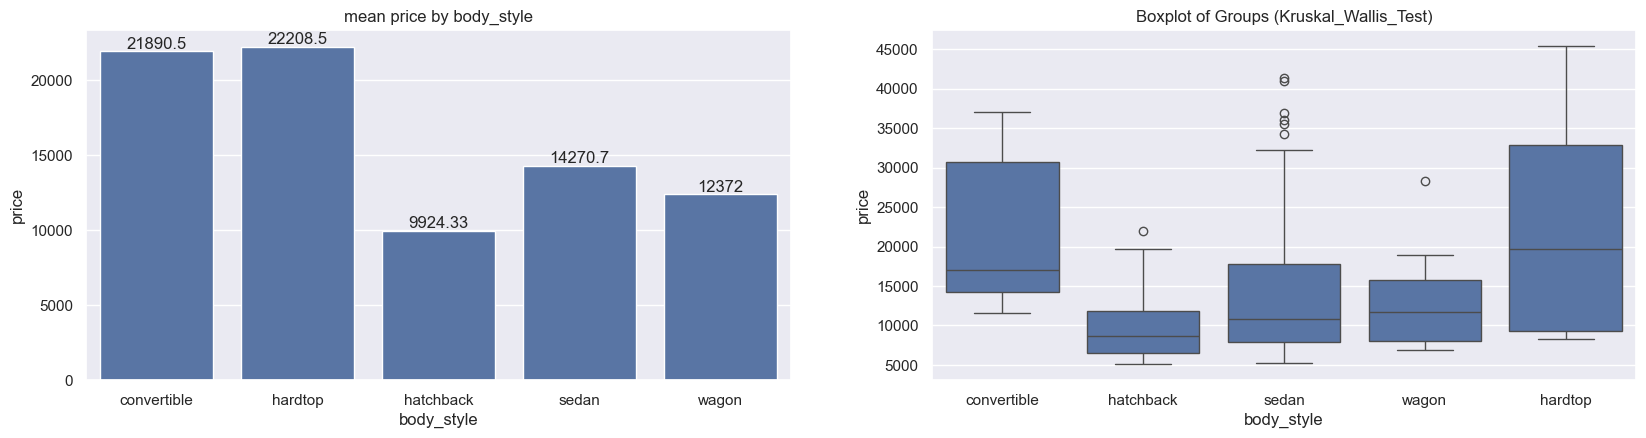

In [423]:
Kruskal_Wallis_Test("body_style")
Visualize_Kruskal_Wallis_Test("body_style") 

In [424]:
posthoc_results = sp.posthoc_dunn(df, val_col="price", group_col="body_style", p_adjust="bonferroni")
    
print("Dunn’s Post-Hoc Test (Adjusted P-values):")
posthoc_results

Dunn’s Post-Hoc Test (Adjusted P-values):


,convertible,hardtop,hatchback,sedan,wagon
convertible,1.000000,1.00000,0.008777,0.457257,0.507269
hardtop,1.000000,1.00000,0.041540,1.000000,1.000000
hatchback,0.008777,0.04154,1.000000,0.002567,0.236858
sedan,0.457257,1.00000,0.002567,1.000000,1.000000
wagon,0.507269,1.00000,0.236858,1.000000,1.000000


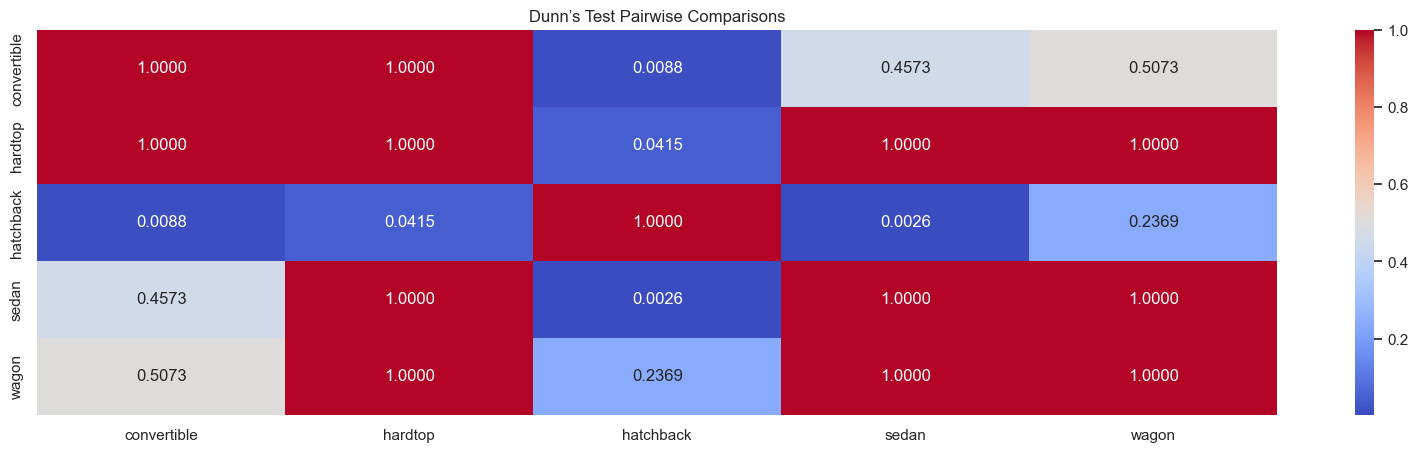

In [425]:
# Visualization
plt.figure(figsize=(20, 5))
sns.heatmap(posthoc_results, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Dunn’s Test Pairwise Comparisons")
plt.show()

---

* *B 2.6 price by make*

In [426]:
df.groupby("make").agg(price_mean=('price', 'mean'),
                               price_median=('price', 'median'),).T

make,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
price_mean,15498.333333,16916.285714,26118.75,6007.0,7875.444444,8184.692308,7150.0,34600.0,10652.882353,33647.0,...,10415.666667,15489.090909,7963.428571,26388.0,9595.0,15223.333333,8541.25,9885.8125,10077.5,18063.181818
price_median,16500.000000,17450.000000,22835.00,6295.0,7609.000000,7295.000000,6178.5,35550.0,10595.000000,32892.0,...,8124.000000,16630.000000,7609.000000,32528.0,9595.0,15275.000000,7894.00,9103.0000,9737.5,18420.000000


######  Kruskal-Wallis Test for make group ######
Kruskal-Wallis Test Statistic: 120.5772
P-value: 0.0000
====> Reject the null hypothesis: At least one group differs significantly.


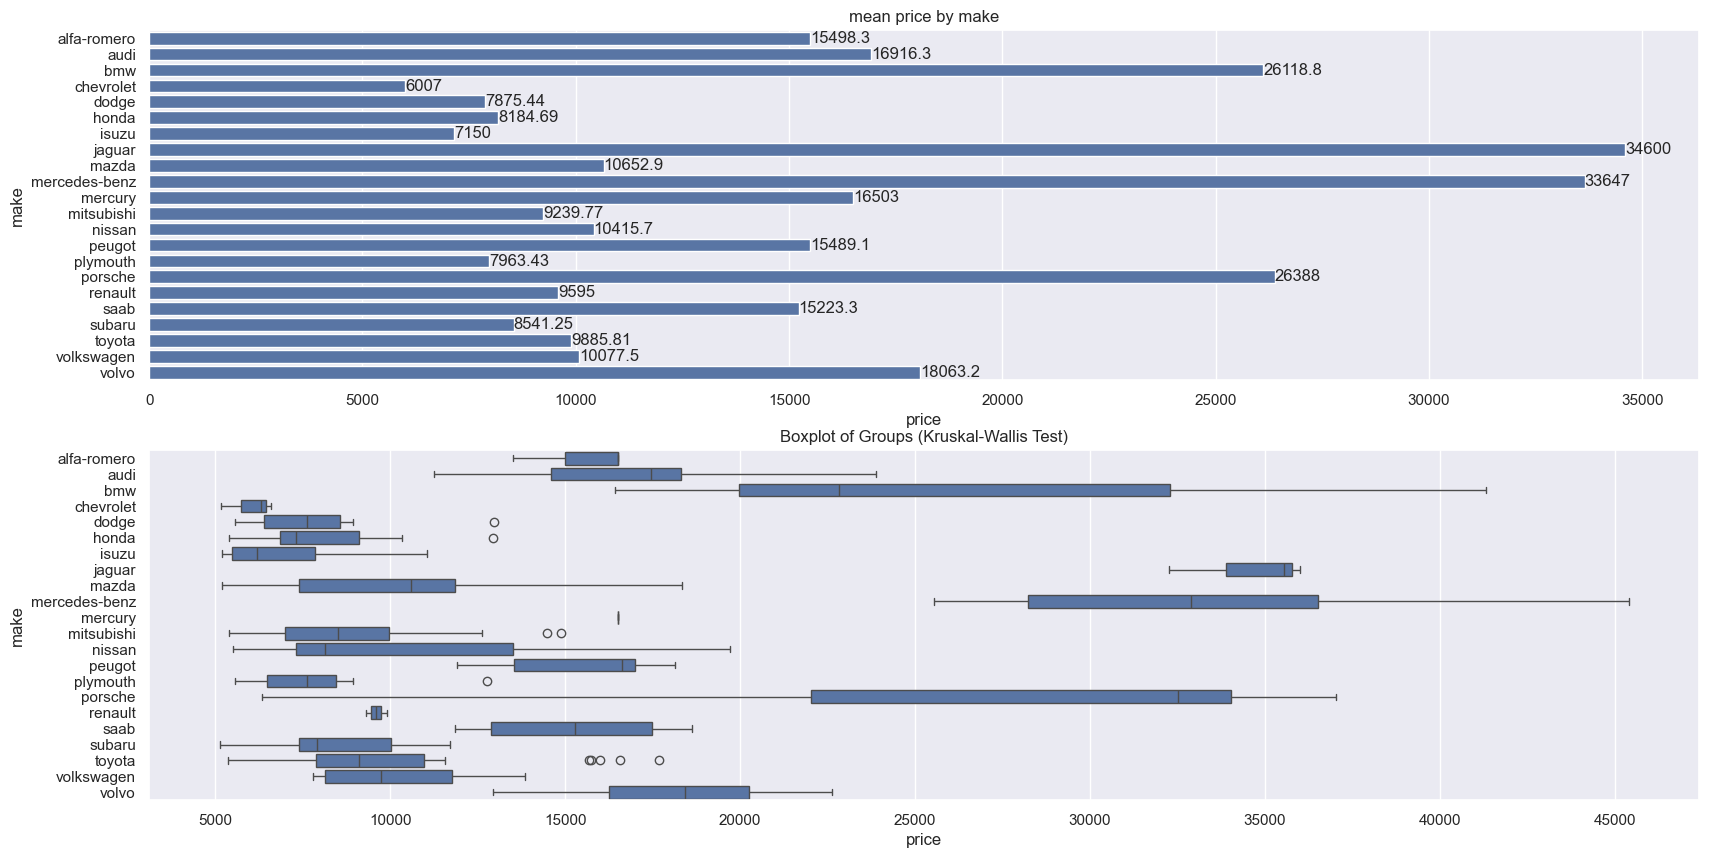

In [427]:
Kruskal_Wallis_Test("make")
plt.subplot(211)
ax = sns.barplot(data=df.groupby("make")["price"].mean().to_frame(),y="make",x="price")
ax.set(title='mean price by make')
for i in ax.containers:
    ax.bar_label(i,);

plt.subplot(212)
sns.boxplot(y=df["make"], x=df["price"])
plt.title("Boxplot of Groups (Kruskal-Wallis Test)")
plt.show()

In [428]:
posthoc_results = sp.posthoc_dunn(df, val_col="price", group_col="make", p_adjust="bonferroni")
    
print("Dunn’s Post-Hoc Test (Adjusted P-values):")
posthoc_results

Dunn’s Post-Hoc Test (Adjusted P-values):


,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
alfa-romero,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
audi,1.0,1.000000,1.000000,0.107619,0.101425,0.092696,0.330409,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.232393,1.000000,1.0,1.000000,0.338395,0.804295,1.000000,1.000000
bmw,1.0,1.000000,1.000000,0.005736,0.001237,0.000694,0.015841,1.000000,0.077579,1.000000,...,0.023580,1.000000,0.005030,1.000000,1.0,1.000000,0.004357,0.006278,0.219065,1.000000
chevrolet,1.0,0.107619,0.005736,1.000000,1.000000,1.000000,1.000000,0.033587,1.000000,0.001338,...,1.000000,0.097871,1.000000,0.185093,1.0,0.348938,1.000000,1.000000,1.000000,0.020543
dodge,1.0,0.101425,0.001237,1.000000,1.000000,1.000000,1.000000,0.052315,1.000000,0.000138,...,1.000000,0.054600,1.000000,0.280222,1.0,0.554116,1.000000,1.000000,1.000000,0.004989
honda,1.0,0.092696,0.000694,1.000000,1.000000,1.000000,1.000000,0.057671,1.000000,0.000061,...,1.000000,0.039344,1.000000,0.300113,1.0,0.595239,1.000000,1.000000,1.000000,0.002667
isuzu,1.0,0.330409,0.015841,1.000000,1.000000,1.000000,1.000000,0.101297,1.000000,0.003411,...,1.000000,0.297358,1.000000,0.567383,1.0,1.000000,1.000000,1.000000,1.000000,0.058619
jaguar,1.0,1.000000,1.000000,0.033587,0.052315,0.057671,0.101297,1.000000,1.000000,1.000000,...,0.539192,1.000000,0.091494,1.000000,1.0,1.000000,0.151169,0.369055,1.000000,1.000000
mazda,1.0,1.000000,0.077579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010083,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.325163
mercedes-benz,1.0,1.000000,1.000000,0.001338,0.000138,0.000061,0.003411,1.000000,0.010083,1.000000,...,0.002602,1.000000,0.000726,1.000000,1.0,1.000000,0.000473,0.000495,0.036769,1.000000


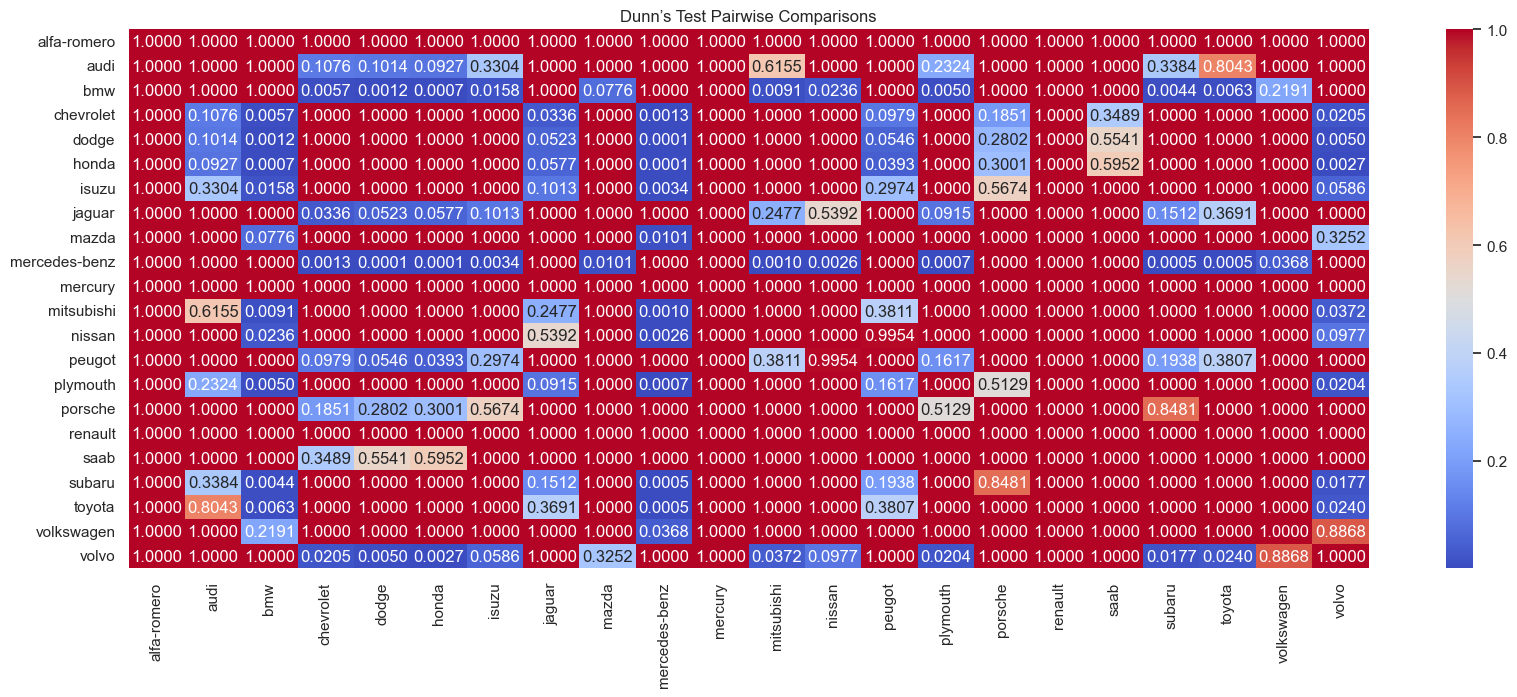

In [429]:
# Visualization
plt.figure(figsize=(20, 7))
sns.heatmap(posthoc_results, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Dunn’s Test Pairwise Comparisons")
plt.show()

---

* *Applying LabelEncoder for categorical features*

In [210]:
from sklearn.preprocessing import LabelEncoder
categories_encoder=LabelEncoder()
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])

---

* *Defines skewness and fix it using PowerTransformer if needed*

In [211]:
discrete_feature=[feature for feature in numerical_features if  len(df[feature].unique())<=25]
countinuous_feature=[feature for feature in numerical_features if  len(df[feature].unique())>25]

In [212]:
print("we have {} discrete feature : {}\n".format(len(discrete_feature),(discrete_feature)))
print("we have {} countinuous feature : {}".format(len(countinuous_feature),(countinuous_feature)))

we have 2 discrete feature : ['symboling', 'peak_rpm']

we have 14 countinuous feature : ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'city_mpg', 'highway_mpg', 'price']


In [213]:
df[countinuous_feature].skew(axis=0,skipna=True)

normalized_losses    0.854028
wheel_base           1.050214
length               0.155954
width                0.904003
height               0.063123
curb_weight          0.681398
engine_size          1.947655
bore                 0.006732
stroke              -0.768677
compression_ratio    2.610862
horsepower           1.403373
city_mpg             0.663704
highway_mpg          0.539997
price                1.726919
dtype: float64

---

* *Define x and y*

In [234]:
x=df.drop("price",axis=1)
y=df["price"]

---

* *Apply StandardScaler*

In [235]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

sc=StandardScaler()
preprocessor=ColumnTransformer([
    ("StandardScaler",sc,x.columns)
]
)

In [236]:
x=preprocessor.fit_transform(x)

---

* *Apply train_test_split*

In [237]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.2,random_state=42)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (164, 25) and Y = (164,) : 
Test data shape of X = (41, 25) and Y = (41,) : 


---

* *Modelling*

In [238]:

from sklearn.metrics import (
    root_mean_squared_error,r2_score
)

from sklearn.ensemble import (
    RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
)

from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb
from xgboost import XGBRFRegressor

from sklearn.linear_model import (
    LinearRegression,GammaRegressor,ElasticNet
)

from sklearn.model_selection import (
    train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score,KFold
)

from sklearn.preprocessing import (
        LabelEncoder,StandardScaler,PowerTransformer,StandardScaler,OneHotEncoder,OrdinalEncoder
        )

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from tqdm import tqdm

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR


In [239]:
models = {
                "RandomForestRegressor": RandomForestRegressor(),
                "DecisionTreeRegressor": DecisionTreeRegressor(),
                "XGBRFRegressor": XGBRFRegressor(),
                "GradientBoostingRegressor":GradientBoostingRegressor(),
                "AdaBoostRegressor": AdaBoostRegressor(),
                "KNeighborsRegressor":KNeighborsRegressor(),
                "SVR":SVR(),
                "ElasticNet":ElasticNet(),
                "LinearRegression":LinearRegression()

}

In [240]:
def evaluation_preds(y_true,predicted):
    RMSE=root_mean_squared_error(y_true,predicted)
    return RMSE

In [241]:
def evalua_models(x_train,y_train,models):
    #x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.20,random_state=42)
    models_list=[]
    RMSE_list=[]
    for i in  range(len(list(models))):
        model=list(models.values())[i]
        model.fit(x_train,y_train)

        train_predicted=model.predict(x_train)
        test_predicted=model.predict(x_test)      
        
        test_predicted_RMSE=evaluation_preds(y_test,test_predicted)
        #=save_evaluation_preds(y_test,test_predicted)
       
        RMSE_list.append(test_predicted_RMSE)

        models_list.append(list(models.keys())[i])
        
    report=pd.DataFrame(list(zip(models_list,RMSE_list)),columns=["model","RMSE"]).sort_values(by="RMSE",ascending=True)
    return report

In [242]:
evalua_models(x_train,y_train,models)

,model,RMSE
0,RandomForestRegressor,3280.522625
3,GradientBoostingRegressor,3292.920860
4,AdaBoostRegressor,3761.467787
1,DecisionTreeRegressor,3821.701179
2,XGBRFRegressor,3823.375533
8,LinearRegression,4340.710905
7,ElasticNet,4883.543094
5,KNeighborsRegressor,5427.779396
6,SVR,9412.066217


In [243]:
np.random.seed(42)
clf=RandomForestRegressor()
clf.fit(x_train,y_train)
predicted=clf.predict(x_test)

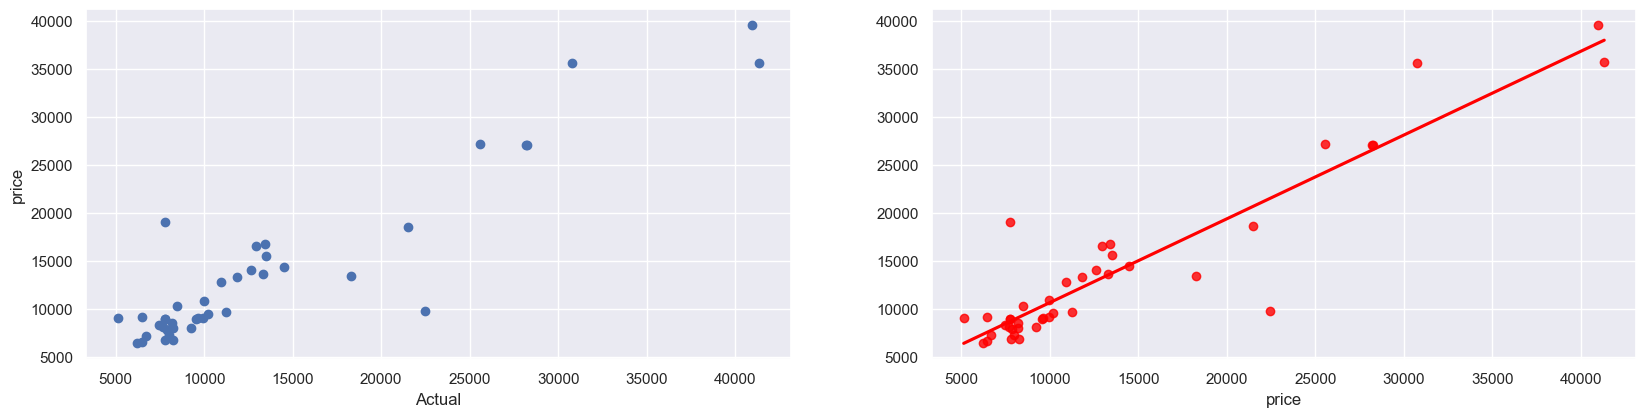

In [244]:
plt.subplot(221)
plt.scatter(y_test,predicted);

plt.xlabel('Actual');
plt.ylabel('price');

plt.subplot(222)
sns.regplot(x=y_test,y=predicted,ci=None,color ='red');
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/modelsEvaluationsGraphs/plot_BestModel_Residual.png',dpi=500); 

In [245]:
clf.feature_names=list(df.drop("price",axis=1).columns)
importance=pd.concat([pd.DataFrame(clf.feature_names,columns=["feature_names"]),
           pd.DataFrame(clf.feature_importances_,columns=["feature_importances"])],axis=1).sort_values(by="feature_importances",ascending=False)
importance

,feature_names,feature_importances
16,engine_size,0.505849
13,curb_weight,0.297469
24,highway_mpg,0.045733
21,horsepower,0.023895
2,make,0.023748
1,normalized_losses,0.017817
6,body_style,0.011353
11,width,0.010308
23,city_mpg,0.010074
10,length,0.008975


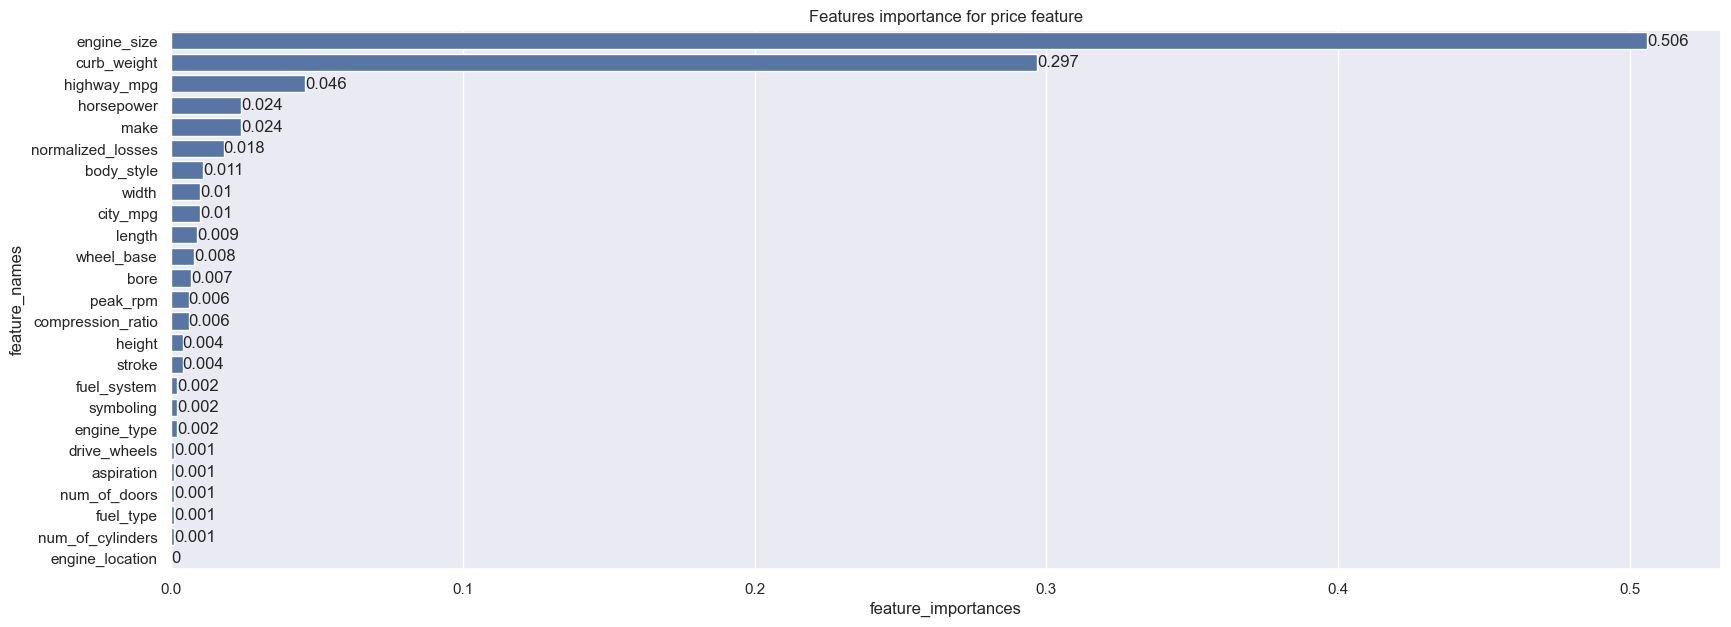

In [246]:
matplotlib.rcParams["figure.figsize"]=(20,7)
ax=sns.barplot(x=np.round(importance["feature_importances"],3),y=importance["feature_names"])
plt.title('Features importance for price feature')
ax.bar_label(ax.containers[0]);
plt.savefig('C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/featuresImportanceGraphs/price_featureImportanc.png',dpi=500); 

In [247]:
import pickle
with open ("C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Automobile_data_Analysis/outcomes/bestModel/price_prediction_model.pkl","wb") as f:
    pickle.dump(clf,f)

In [248]:
from tqdm import tqdm
from hyperopt import fmin, tpe, hp, SparkTrials, STATUS_OK,Trials

In [ ]:
models = {
                "RandomForestRegressor": RandomForestRegressor(),
                "XGBRFRegressor": XGBRFRegressor(),
                "GradientBoostingRegressor":GradientBoostingRegressor(),
                "AdaBoostRegressor": AdaBoostRegressor()
        }

search_spaces ={        
        "XGBRFRegressor":{
            "learning_rate": hp.uniform("learning_rate",0.01,1.0),    # 0.3 is the default
            "max_depth": hp.choice("max_depth", [None,2, 4, 5, 6,7,8]),
            "subsample": hp.uniform("subsample",0.5,1.0),
            "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600])
            },
                    
        "GradientBoostingRegressor":{
            "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
            "max_depth": hp.choice("max_depth", [2, 4, 5, 6,7,8]),
            "max_features": hp.choice("max_features",["sqrt", "log2"]),
            "learning_rate": hp.uniform("learning_rate",0.01,1.0),
            "subsample": hp.uniform("subsample",0.8,1.0),
            "min_samples_split": hp.uniform("min_samples_split",0.8,1.0),
            "min_samples_leaf": hp.uniform("min_samples_leaf",0.8,1.0),
            "criterion": hp.choice("criterion",["squared_error", "friedman_mse"])
            },
        "RandomForestRegressor":{
            "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]), 
            "min_samples_split": hp.uniform("min_samples_split",0.8,1.0),
            "min_samples_leaf": hp.uniform("min_samples_leaf",0.8,1.0),
            "bootstrap": hp.choice("bootstrap",[True, False]),                                                                                                    
            "max_features": hp.choice("max_features",["sqrt", "log2"]),                                    
            "max_depth": hp.choice("max_depth", [2, 4, 5, 6,7,8]),
            "criterion": hp.choice("criterion",["poisson", "squared_error", "friedman_mse","absolute_error"]),
            "max_samples": hp.uniform("max_samples", 0.5, 1.0)                  
        },

        "AdaBoostRegressor":{
            "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
            "learning_rate": hp.uniform("learning_rate",0.05,1.0)
        }                  
}

---

In [313]:
space=search_spaces["RandomForestRegressor"]
def hyperparameter_tuning(space):
    if not space["bootstrap"]:
        space["max_samples"] = None
    clf = RandomForestRegressor(**space)
    clf.fit(x_train,y_train)
    RMSE = root_mean_squared_error(y_test,clf.predict(x_test))
    RMSE=round(RMSE,3)

    return {"loss": RMSE, "status": STATUS_OK}

trials = Trials()
best_RandomForestRegressor = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)      

100%|██████████| 10/10 [00:03<00:00,  3.10trial/s, best loss: 8986.56]


In [314]:
best_RandomForestRegressor

{'bootstrap': np.int64(0),
 'criterion': np.int64(2),
 'max_depth': np.int64(5),
 'max_features': np.int64(1),
 'max_samples': np.float64(0.5067006866647106),
 'min_samples_leaf': np.float64(0.9461566215908407),
 'min_samples_split': np.float64(0.9863825440936758),
 'n_estimators': np.int64(5)}

In [380]:
np.random.seed(42)
model = RandomForestRegressor(**best_RandomForestRegressor)
clf.fit(x_train,y_train)
predicted=clf.predict(x_test)
root_mean_squared_error(y_test,predicted)

np.float64(3341.69831235998)

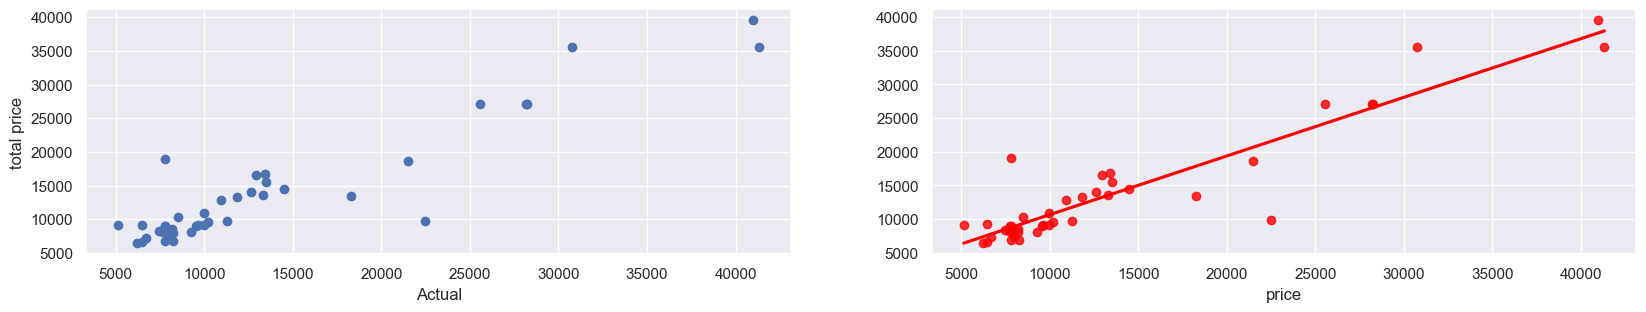

In [316]:
plt.subplot(221)
plt.scatter(y_test,predicted);

plt.xlabel('Actual');
plt.ylabel('total price');

plt.subplot(222)
sns.regplot(x=y_test,y=predicted,ci=None,color ='red');

In [382]:
space=search_spaces["GradientBoostingRegressor"]
def hyperparameter_tuning(space):
    clf = GradientBoostingRegressor(**space)
    clf.fit(x_train,y_train)
    RMSE = root_mean_squared_error(y_test,clf.predict(x_test))
    RMSE=round(RMSE,3)

    return {"loss": RMSE, "status": STATUS_OK}

trials = Trials()
best_GradientBoostingRegressor = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)  


  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 10/10 [00:01<00:00,  5.91trial/s, best loss: 8985.118]


In [383]:
best_GradientBoostingRegressor

{'criterion': np.int64(1),
 'learning_rate': np.float64(0.511275401157656),
 'max_depth': np.int64(1),
 'max_features': np.int64(1),
 'min_samples_leaf': np.float64(0.8580709132715644),
 'min_samples_split': np.float64(0.9482341188230903),
 'n_estimators': np.int64(1),
 'subsample': np.float64(0.834785252070391)}

In [384]:
if best_GradientBoostingRegressor["criterion"]==0 : best_GradientBoostingRegressor["criterion"]="squared_error"
else : best_GradientBoostingRegressor["criterion"]="friedman_mse"
if best_GradientBoostingRegressor["max_features"]==0 : best_GradientBoostingRegressor["max_features"]="sqrt"
else : best_GradientBoostingRegressor["max_features"]="log2"
model = GradientBoostingRegressor(**best_GradientBoostingRegressor)
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("evaluation_preds :\n" , evaluation_preds(y_test,predicted))

evaluation_preds :
 8991.095382508689


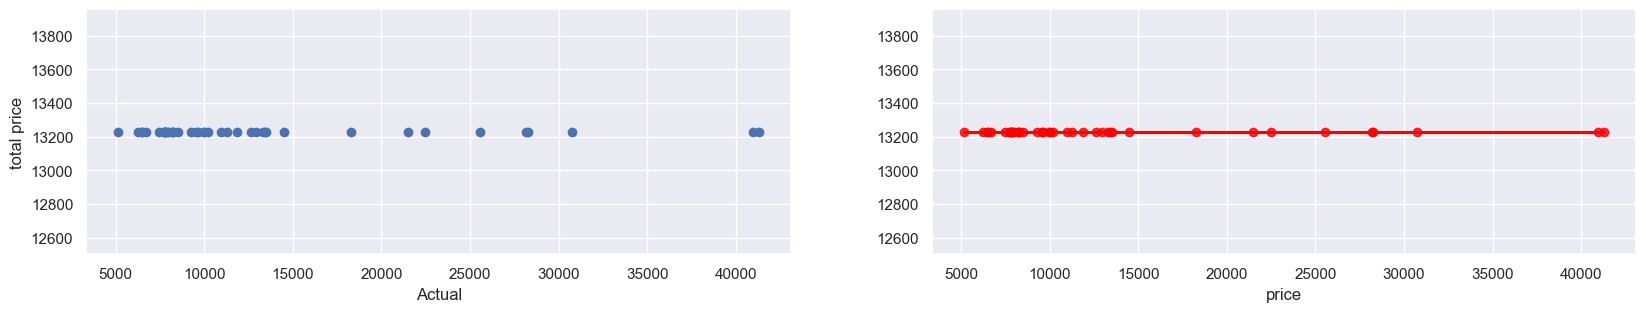

In [385]:
plt.subplot(221)
plt.scatter(y_test,predicted);

plt.xlabel('Actual');
plt.ylabel('total price');

plt.subplot(222)
sns.regplot(x=y_test,y=predicted,ci=None,color ='red');

In [390]:
space=search_spaces["XGBRFRegressor"]
def hyperparameter_tuning(space):
    clf = XGBRFRegressor(**space)
    clf.fit(x_train,y_train)
    RMSE = root_mean_squared_error(y_test,clf.predict(x_test))
    RMSE=round(RMSE,3)

    return {"loss": RMSE, "status": STATUS_OK}

trials = Trials()
best_XGBRFRegressor = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)

100%|██████████| 10/10 [00:01<00:00,  5.21trial/s, best loss: 3494.107]


In [391]:
best_XGBRFRegressor

{'learning_rate': np.float64(0.8961624903150527),
 'max_depth': np.int64(6),
 'n_estimators': np.int64(1),
 'subsample': np.float64(0.9962555485801594)}

In [392]:
model = XGBRFRegressor(**best_XGBRFRegressor)
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("evaluation_preds :\n" , evaluation_preds(y_test,predicted))
XGBRF_evaluation_preds=evaluation_preds(y_test,predicted)

evaluation_preds :
 3869.458755158093


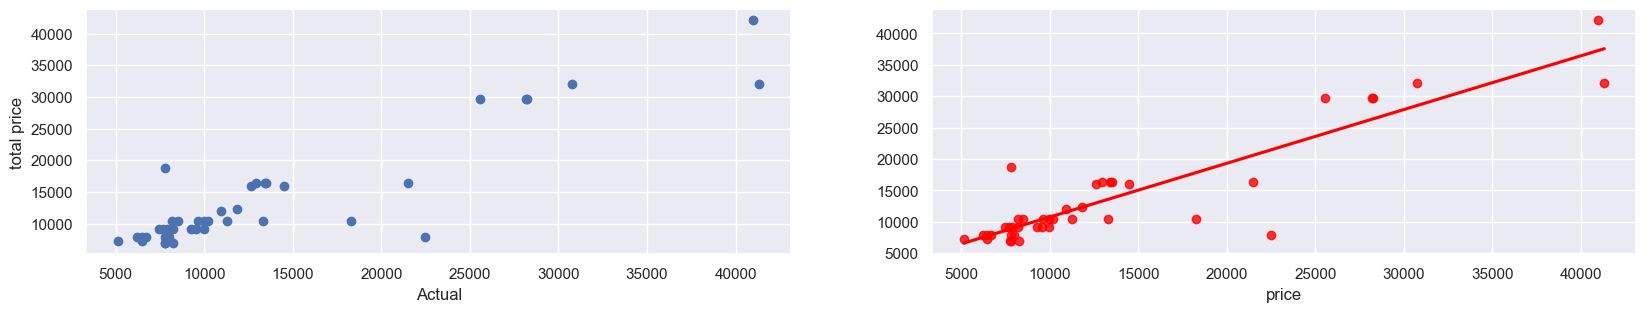

In [393]:
plt.subplot(221)
plt.scatter(y_test,predicted);

plt.xlabel('Actual');
plt.ylabel('total price');

plt.subplot(222)
sns.regplot(x=y_test,y=predicted,ci=None,color ='red');

In [394]:
space=search_spaces["AdaBoostRegressor"]
def hyperparameter_tuning(space):
    clf = AdaBoostRegressor(**space)
    clf.fit(x_train,y_train)
    RMSE = root_mean_squared_error(y_test,clf.predict(x_test))
    RMSE=round(RMSE,3)

    return {"loss": RMSE, "status": STATUS_OK}

trials = Trials()
best_AdaBoostRegressor = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=10, 
    trials=trials
)    

100%|██████████| 10/10 [00:06<00:00,  1.50trial/s, best loss: 3404.708]


In [395]:
best_AdaBoostRegressor

{'learning_rate': np.float64(0.1976858789766623), 'n_estimators': np.int64(3)}

In [396]:
model = AdaBoostRegressor(**best_AdaBoostRegressor)
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("evaluation_preds :\n" , evaluation_preds(y_test,predicted))
ADAboost_evaluation_preds=evaluation_preds(y_test,predicted)

evaluation_preds :
 4070.65187371293


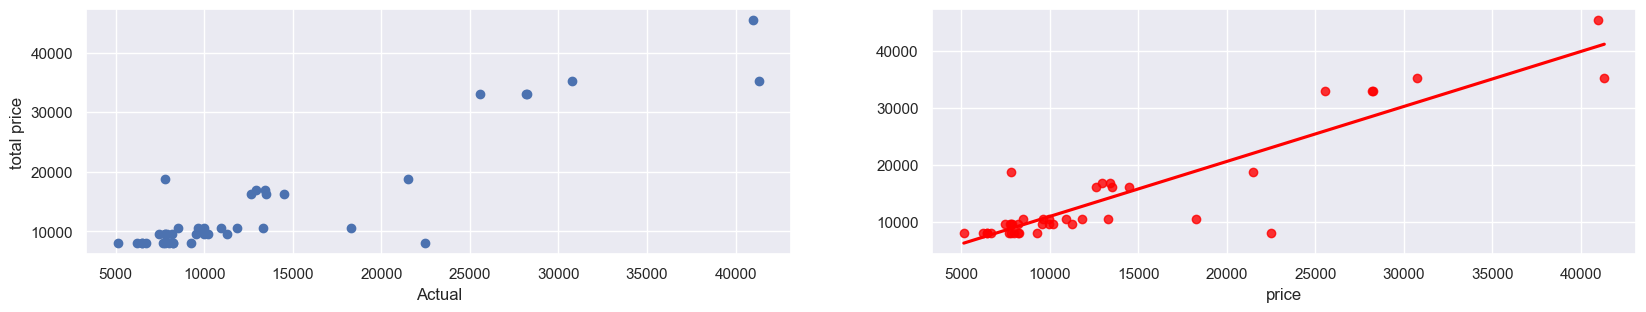

In [397]:
plt.subplot(221)
plt.scatter(y_test,predicted);

plt.xlabel('Actual');
plt.ylabel('total price');

plt.subplot(222)
sns.regplot(x=y_test,y=predicted,ci=None,color ='red');

---

In [176]:
from sklearn.linear_model import TheilSenRegressor

In [179]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,148,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,119,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,150,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450


In [398]:
model = TheilSenRegressor().fit(x_train, y_train)
predictions = model.predict(x_test)
print("evaluation_preds :\n" , evaluation_preds(y_test,predictions))

evaluation_preds :
 4763.894552348404


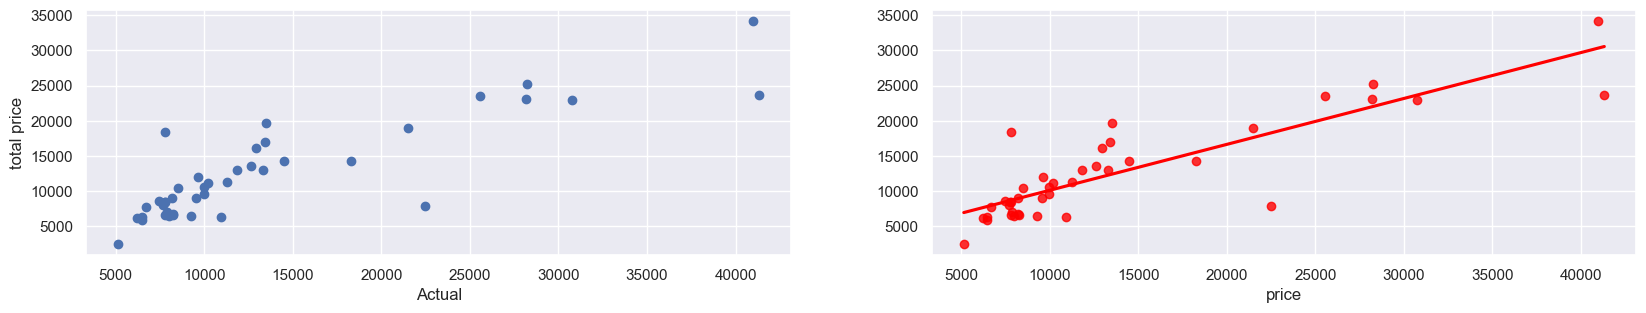

In [401]:
plt.subplot(221)
plt.scatter(y_test,predictions);

plt.xlabel('Actual');
plt.ylabel('total price');

plt.subplot(222)
sns.regplot(x=y_test,y=predictions,ci=None,color ='red');

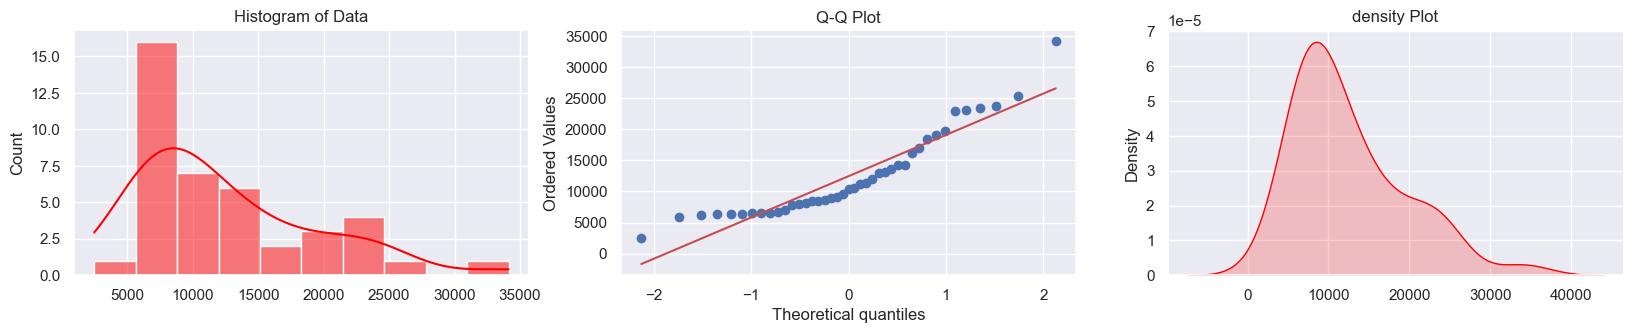

In [400]:
plt.subplot(231)
sns.histplot(np.round(predictions), bins=10, kde=True, color="red")
plt.title("Histogram of Data")

import scipy.stats as stats
plt.subplot(232)
stats.probplot(np.round(predictions), dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.subplot(233)
sns.kdeplot(np.round(predictions), color="red", fill=True, alpha=0.2)
plt.title("density Plot")
plt.show()

---